# 1. Defining the problem

1.Creating Multiple Linear Regression model for Prediction of the Air Quality of Banaras Hindu University

2.Checking whether our model satisfy all the assumption of Multiple Linear Regression model

3.To predict the Air Quality of Banaras Hindu University using the formed Multiple Linear Regression model

4.Checking whether Air Quality Index follow Stationary or non Stationary Time series model

5.Creating a Auto Regrssive Integrated Moving Average model and estimating there lags

6.To predict the Air Quality of Banaras Hindu University using the formed ARIMA(p.d.q) model

# 2. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import scipy as sp
import os
import warnings
from sklearn.model_selection import train_test_split 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics import tsaplots
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import shapiro
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tools.tools as smt
import statsmodels.stats.diagnostic as smd
from sklearn.metrics import mean_squared_error
from math import sqrt

# 3. Performing Exploratory Data Analysis

>3.1 Importing Dataset

In [2]:
os.chdir("E:\\Project")
#Renaming the AQI dataset as AQI
AQI=pd.read_excel("AQI.xlsx")

>3.2 Exploring Dataset

In [3]:
AQI.describe()

PM2.5        PM10         NO2         NH3         SO2          CO  \
count  548.000000  574.000000  587.000000  573.000000  595.000000  606.000000   
mean    67.178832   70.982578   20.945486    4.270506   21.426891   17.445545   
std     54.291287   32.394973   11.110848    2.894132    9.063707   13.124055   
min      6.000000    7.000000    3.000000    1.000000    1.000000    1.000000   
25%     29.000000   44.000000   12.000000    2.000000   15.500000    9.000000   
50%     51.000000   69.000000   19.000000    3.000000   20.000000   14.000000   
75%     86.000000   94.000000   29.000000    6.000000   25.000000   22.000000   
max    333.000000  204.000000   79.000000   32.000000   48.000000   74.000000   

            OZONE         AQI     TEMPMAX     TEMPMIN  ...  WIND_DIRECTION  \
count  589.000000  584.000000  609.000000  609.000000  ...      609.000000   
mean    25.796265   85.145548   88.717898   67.853695  ...      193.583415   
std     32.375706   48.874408   11.763824   12.707331  ...      105.844618   
min      1.000000    9.000000   57.200000   40.200000  ...        0.700000   
25%      6.000000   49.000000   80.700000   55.500000  ...       81.600000   
50%     10.000000   78.000000   91.500000   73.500000  ...      247.900000   
75%     33.000000  104.000000   96.900000   78.900000  ...      282.500000   
max    193.000000  333.000000  115.600000   90.800000  ...      359.000000   

       SEA_LEVEL_PRESSURE  CLOUD_COVER  VISIBILITY  SOLAR_RADIATION  \
count          609.000000   609.000000  609.000000       609.000000   
mean          1008.086535    35.143186    2.686700       218.997209   
std              6.990926    30.870826    1.378549        57.192078   
min            995.000000     0.000000    0.200000        15.900000   
25%           1002.200000     4.600000    1.800000       182.800000   
50%           1007.000000    29.800000    2.400000       212.300000   
75%           1014.300000    63.300000    3.500000       250.300000   
max           1023.300000    98.400000   15.000000       344.800000   

       SOLAR_ENERGY    UV_INDEX  SEVER_RISK  DAYLIGHT_DURATION   MOONPHASE  
count    609.000000  609.000000  408.000000         609.000000  609.000000  
mean      18.900493    7.834154   14.897059          12.021544    0.503087  
std        4.931793    1.500137   11.400642           1.104458    0.289242  
min        1.200000    1.000000   10.000000          10.557778    0.000000  
25%       15.800000    7.000000   10.000000          10.948889    0.250000  
50%       18.300000    8.000000   10.000000          11.914167    0.510000  
75%       21.500000    9.000000   10.000000          13.106111    0.750000  
max       29.900000   10.000000   60.000000          13.716111    1.000000  

[8 rows x 33 columns]

In [4]:
#Searching for null values in columns
AQI.isnull().sum()

DATE                     0
PM2.5                   61
PM10                    35
NO2                     22
NH3                     36
SO2                     14
CO                       3
OZONE                   20
AQI                     25
TEMPMAX                  0
TEMPMIN                  0
TEMPERATURE              0
FEELS_LIKE_MAX           0
FEELS_LIKE_MIN           0
FEELS_LIKE               0
DEW                      0
HUMIDITY                 0
PRECIPITATE              0
PRECI_PROB               0
PRECIP_COVER             0
PRCIP_TYPE             419
SNOW                     0
SNOW_DEPTH               0
WIND_GUST              201
WIND_SPEED               0
WIND_DIRECTION           0
SEA_LEVEL_PRESSURE       0
CLOUD_COVER              0
VISIBILITY               0
SOLAR_RADIATION          0
SOLAR_ENERGY             0
UV_INDEX                 0
SEVER_RISK             201
SUNRISE                  0
SUNSET                   0
DAYLIGHT_DURATION        0
MOONPHASE                0
C

In [5]:
AQI.columns

Index(['DATE', 'PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'OZONE', 'AQI',
       'TEMPMAX', 'TEMPMIN', 'TEMPERATURE', 'FEELS_LIKE_MAX', 'FEELS_LIKE_MIN',
       'FEELS_LIKE', 'DEW', 'HUMIDITY', 'PRECIPITATE', 'PRECI_PROB',
       'PRECIP_COVER', 'PRCIP_TYPE', 'SNOW', 'SNOW_DEPTH', 'WIND_GUST',
       'WIND_SPEED', 'WIND_DIRECTION', 'SEA_LEVEL_PRESSURE', 'CLOUD_COVER',
       'VISIBILITY', 'SOLAR_RADIATION', 'SOLAR_ENERGY', 'UV_INDEX',
       'SEVER_RISK', 'SUNRISE', 'SUNSET', 'DAYLIGHT_DURATION', 'MOONPHASE',
       'CONDITION', 'WEATHER_DESCRIPTION', 'ICON', 'stations'],
      dtype='object')

>3.3 Data Cleaning

In [6]:
AQI=AQI.drop(['PRCIP_TYPE',"WIND_GUST","SEVER_RISK",'SUNRISE',"SUNSET","TEMPMAX", "TEMPMIN",
          'FEELS_LIKE_MAX', 'FEELS_LIKE_MIN',"FEELS_LIKE",'PRECI_PROB','SNOW', 'SNOW_DEPTH',
          'WEATHER_DESCRIPTION', 'ICON', 'stations'],axis=1)
AQI=AQI.dropna()
AQI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 608
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   DATE                506 non-null    datetime64[ns]
 1   PM2.5               506 non-null    float64       
 2   PM10                506 non-null    float64       
 3   NO2                 506 non-null    float64       
 4   NH3                 506 non-null    float64       
 5   SO2                 506 non-null    float64       
 6   CO                  506 non-null    float64       
 7   OZONE               506 non-null    float64       
 8   AQI                 506 non-null    float64       
 9   TEMPERATURE         506 non-null    float64       
 10  DEW                 506 non-null    float64       
 11  HUMIDITY            506 non-null    float64       
 12  PRECIPITATE         506 non-null    float64       
 13  PRECIP_COVER        506 non-null    float64       

In [7]:
#Saving the datadet wint no null values in new excel workbook as BHU_AQI
AQI.to_excel(r'E:\\Project\BHU_AQI.xlsx',index=True)
BHU_AQI=pd.read_excel("BHU_AQI.xlsx")
BHU_AQI.columns,BHU_AQI.shape

(Index(['Unnamed: 0', 'DATE', 'PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO',
        'OZONE', 'AQI', 'TEMPERATURE', 'DEW', 'HUMIDITY', 'PRECIPITATE',
        'PRECIP_COVER', 'WIND_SPEED', 'WIND_DIRECTION', 'SEA_LEVEL_PRESSURE',
        'CLOUD_COVER', 'VISIBILITY', 'SOLAR_RADIATION', 'SOLAR_ENERGY',
        'UV_INDEX', 'DAYLIGHT_DURATION', 'MOONPHASE', 'CONDITION'],
       dtype='object'),
 (506, 26))

In [8]:
BHU_AQI.WIND_DIRECTION.head()

0    109.4
1     27.8
2    343.2
3     31.4
4     62.8
Name: WIND_DIRECTION, dtype: float64

As we can see the variable WIND_DIRECTION take continouse values [0-360] so converting them in classes, and assigning them numeric values in new column named as WIND_DIRECTION_status.

In [9]:
NE= BHU_AQI[(BHU_AQI.WIND_DIRECTION>22.5)&(BHU_AQI.WIND_DIRECTION<=67.5)].index
E = BHU_AQI[(BHU_AQI.WIND_DIRECTION>67.5) & (BHU_AQI.WIND_DIRECTION<=112.5)].index
SE= BHU_AQI[(BHU_AQI.WIND_DIRECTION>112.5) & (BHU_AQI.WIND_DIRECTION<=157.5)].index
S = BHU_AQI[(BHU_AQI.WIND_DIRECTION>157.5) & (BHU_AQI.WIND_DIRECTION<=202.5)].index
SW= BHU_AQI[(BHU_AQI.WIND_DIRECTION>202.5)&(BHU_AQI.WIND_DIRECTION<=247.5)].index
W = BHU_AQI[(BHU_AQI.WIND_DIRECTION>247.5) & (BHU_AQI.WIND_DIRECTION<=292.5)].index
NW= BHU_AQI[(BHU_AQI.WIND_DIRECTION>292.5) & (BHU_AQI.WIND_DIRECTION<=337.5)].index
N = BHU_AQI[((BHU_AQI.WIND_DIRECTION>337.5) & (BHU_AQI.WIND_DIRECTION<=360))|
        ((BHU_AQI.WIND_DIRECTION>=0) & (BHU_AQI.WIND_DIRECTION<=22.5))].index

In [10]:
BHU_AQI.loc[NE,'WIND_DIRECTION_Status'] = 'NE'
BHU_AQI.loc[E,'WIND_DIRECTION_Status'] = 'E'
BHU_AQI.loc[SE,'WIND_DIRECTION_Status'] = 'SE'
BHU_AQI.loc[S,'WIND_DIRECTION_Status'] = 'S'
BHU_AQI.loc[SW,'WIND_DIRECTION_Status'] = 'SW'
BHU_AQI.loc[W,'WIND_DIRECTION_Status'] = 'W'
BHU_AQI.loc[NW,'WIND_DIRECTION_Status'] = 'NW'
BHU_AQI.loc[N,'WIND_DIRECTION_Status'] = 'N'
BHU_AQI.WIND_DIRECTION_Status.head()

0     E
1    NE
2     N
3    NE
4    NE
Name: WIND_DIRECTION_Status, dtype: object

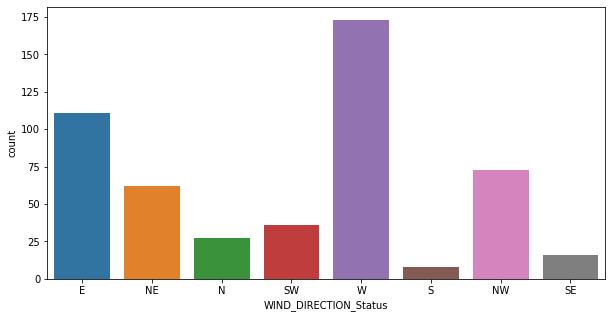

In [11]:
fig, ax=plt.subplots(figsize=(10,5))
sns.countplot(x='WIND_DIRECTION_Status', data=BHU_AQI)
plt.show()

In [12]:
BHU_AQI.loc[NE,'WIND_DIRECTION_Status'] = '1'
BHU_AQI.loc[E,'WIND_DIRECTION_Status'] = '2'
BHU_AQI.loc[SE,'WIND_DIRECTION_Status'] = '3'
BHU_AQI.loc[S,'WIND_DIRECTION_Status'] = '4'
BHU_AQI.loc[SW,'WIND_DIRECTION_Status'] = '5'
BHU_AQI.loc[W,'WIND_DIRECTION_Status'] = '6'
BHU_AQI.loc[NW,'WIND_DIRECTION_Status'] = '7'
BHU_AQI.loc[N,'WIND_DIRECTION_Status'] = '8'
BHU_AQI.WIND_DIRECTION_Status.head()

0    2
1    1
2    8
3    1
4    1
Name: WIND_DIRECTION_Status, dtype: object

The datatype of column WIND_DIRECTION_Status is object so converting it to integer type.

In [13]:
BHU_AQI['WIND_DIRECTION_Status']=BHU_AQI['WIND_DIRECTION_Status'].astype(int)

The Condition variable also take values as object datatype, so converting them into numeric values.

In [14]:
BHU_AQI.CONDITION.unique()

array(['Rain, Partially cloudy', 'Rain, Overcast', 'Partially cloudy',
       'Overcast', 'Clear'], dtype=object)

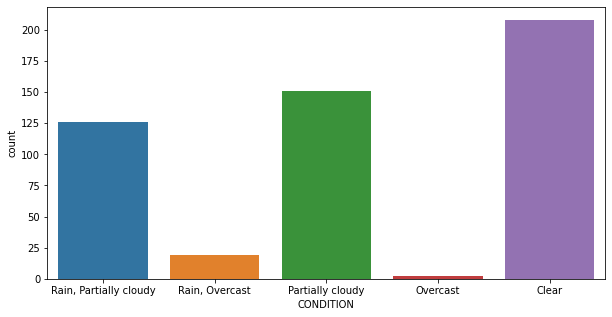

In [15]:
fig, ax=plt.subplots(figsize=(10,5))
sns.countplot(x='CONDITION', data=BHU_AQI)
plt.show()

In [16]:
BHU_AQI.insert(25,"CONDITION_status",BHU_AQI.CONDITION.replace(['Rain, Partially cloudy',
                                                            'Rain, Overcast', 'Partially cloudy',
                                                            'Overcast', 'Clear'],[1,2,3,4,5]))
BHU_AQI.CONDITION_status.head()

0    1
1    1
2    2
3    2
4    1
Name: CONDITION_status, dtype: int64

In [17]:
BHU_AQI=BHU_AQI.drop(['CONDITION','WIND_DIRECTION'],axis=1)
BHU_AQI.shape

(506, 26)

Checking for outlier and dropping them

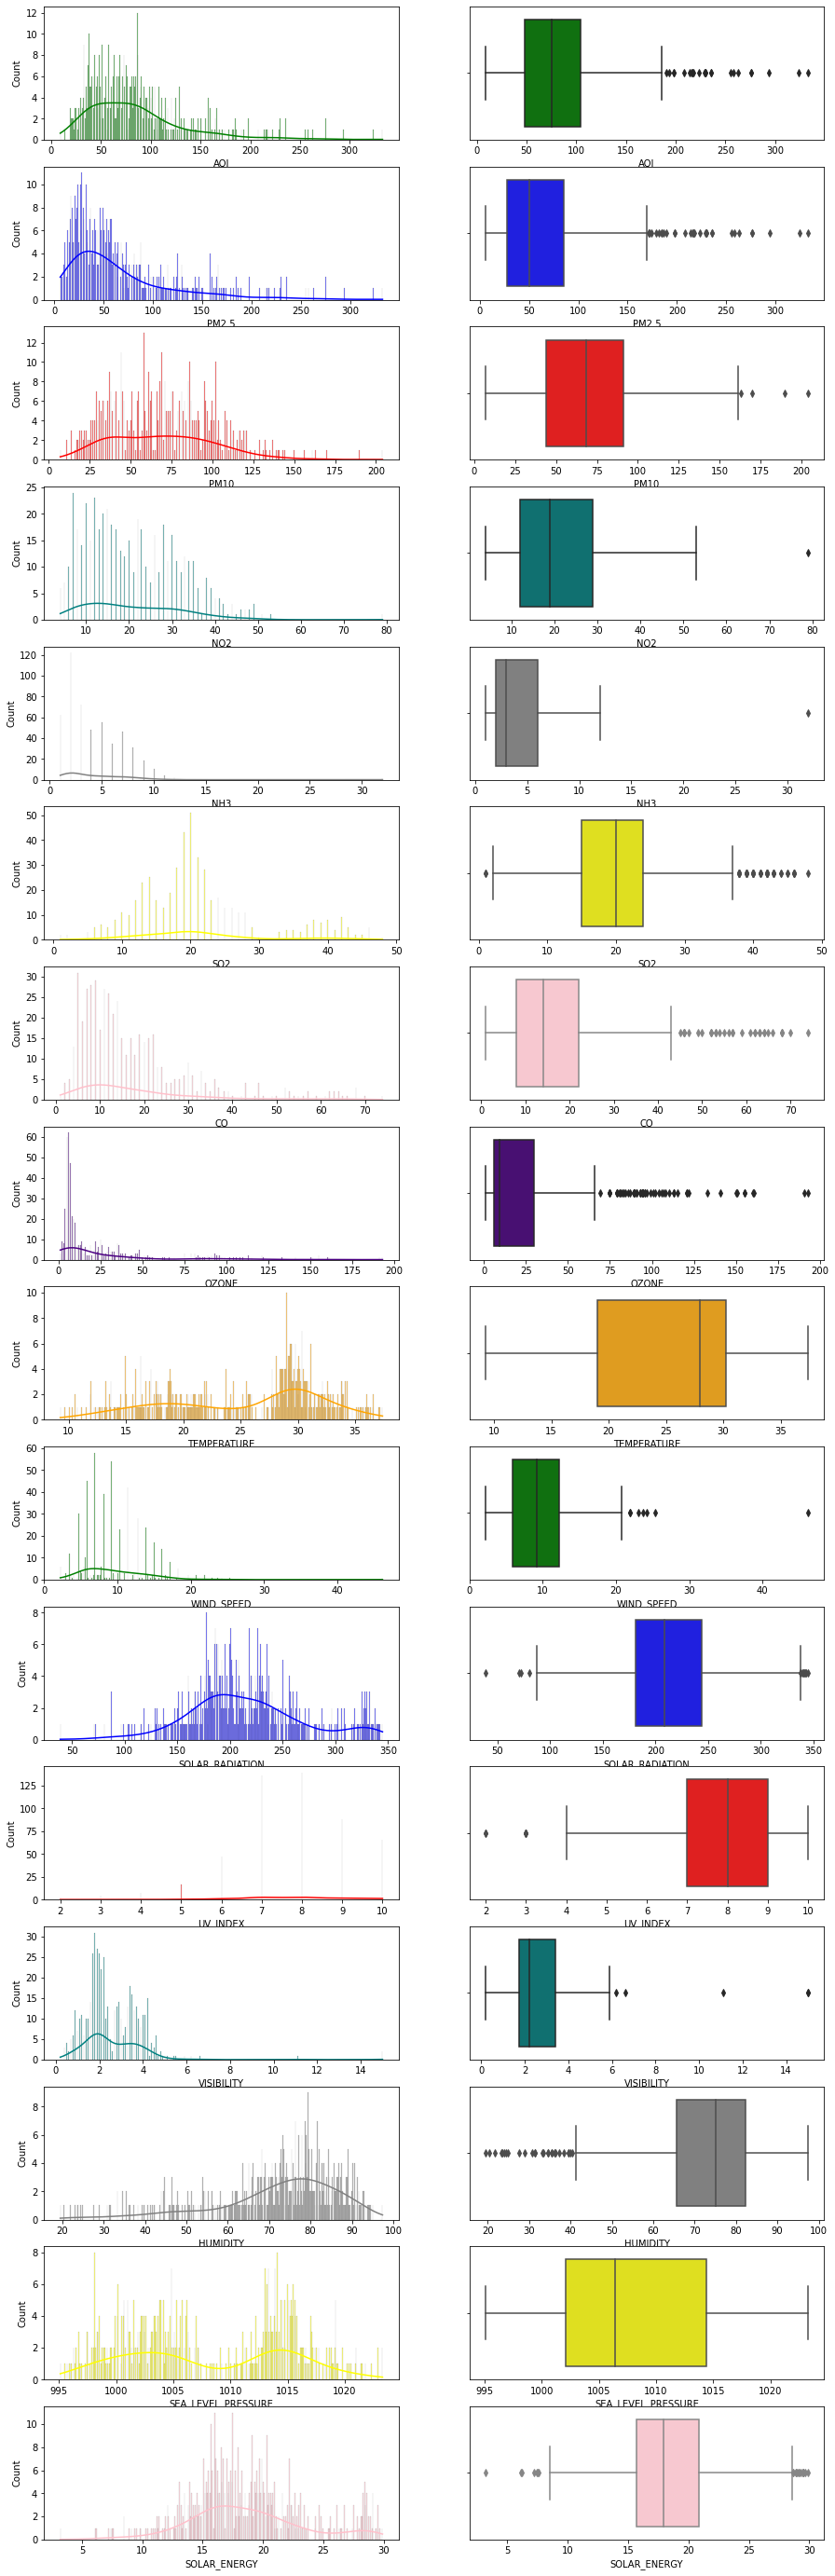

In [18]:
fig, axes = plt.subplots(16,2 , figsize=(15, 50))
sns.histplot(data=BHU_AQI,x="AQI",bins=442,kde=True,color="green",ax=axes[0,0])
sns.boxplot(data=BHU_AQI,x="AQI",color="green",ax=axes[0,1])
sns.histplot(data=BHU_AQI,x="PM2.5",bins=442,kde=True,color="blue",ax=axes[1,0])
sns.boxplot(data=BHU_AQI,x="PM2.5",color="blue",ax=axes[1,1])
sns.histplot(data=BHU_AQI,x="PM10",bins=442,kde=True,color="red",ax=axes[2,0])
sns.boxplot(data=BHU_AQI,x="PM10",color="red",ax=axes[2,1])
sns.histplot(data=BHU_AQI,x="NO2",bins=442,kde=True,color="teal",ax=axes[3,0])
sns.boxplot(data=BHU_AQI,x="NO2",color="teal",ax=axes[3,1])
sns.histplot(data=BHU_AQI,x="NH3",bins=442,kde=True,color="gray",ax=axes[4,0])
sns.boxplot(data=BHU_AQI,x="NH3",color="gray",ax=axes[4,1])
sns.histplot(data=BHU_AQI,x="SO2",bins=442,kde=True,color="yellow",ax=axes[5,0])
sns.boxplot(data=BHU_AQI,x="SO2",color="yellow",ax=axes[5,1])
sns.histplot(data=BHU_AQI,x="CO",bins=442,kde=True,color="pink",ax=axes[6,0])
sns.boxplot(data=BHU_AQI,x="CO",color="pink",ax=axes[6,1])
sns.histplot(data=BHU_AQI,x="OZONE",bins=442,kde=True,color="indigo",ax=axes[7,0])
sns.boxplot(data=BHU_AQI,x="OZONE",color="indigo",ax=axes[7,1])
sns.histplot(data=BHU_AQI,x="TEMPERATURE",bins=442,kde=True,color="orange",ax=axes[8,0])
sns.boxplot(data=BHU_AQI,x="TEMPERATURE",color="orange",ax=axes[8,1])
sns.histplot(data=BHU_AQI,x="WIND_SPEED",bins=442,kde=True,color="green",ax=axes[9,0])
sns.boxplot(data=BHU_AQI,x="WIND_SPEED",color="green",ax=axes[9,1])
sns.histplot(data=BHU_AQI,x="SOLAR_RADIATION",bins=442,kde=True,color="blue",ax=axes[10,0])
sns.boxplot(data=BHU_AQI,x="SOLAR_RADIATION",color="blue",ax=axes[10,1])
sns.histplot(data=BHU_AQI,x="UV_INDEX",bins=442,kde=True,color="red",ax=axes[11,0])
sns.boxplot(data=BHU_AQI,x="UV_INDEX",color="red",ax=axes[11,1])
sns.histplot(data=BHU_AQI,x="VISIBILITY",bins=442,kde=True,color="teal",ax=axes[12,0])
sns.boxplot(data=BHU_AQI,x="VISIBILITY",color="teal",ax=axes[12,1])
sns.histplot(data=BHU_AQI,x="HUMIDITY",bins=442,kde=True,color="gray",ax=axes[13,0])
sns.boxplot(data=BHU_AQI,x="HUMIDITY",color="gray",ax=axes[13,1])
sns.histplot(data=BHU_AQI,x="SEA_LEVEL_PRESSURE",bins=442,kde=True,color="yellow",ax=axes[14,0])
sns.boxplot(data=BHU_AQI,x="SEA_LEVEL_PRESSURE",color="yellow",ax=axes[14,1])
sns.histplot(data=BHU_AQI,x="SOLAR_ENERGY",bins=442,kde=True,color="pink",ax=axes[15,0])
sns.boxplot(data=BHU_AQI,x="SOLAR_ENERGY",color="pink",ax=axes[15,1])
plt.show()

In [19]:
#Checking for outliers in possible variables using Z-score
z=np.abs(stats.zscore(BHU_AQI[['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO',
       'OZONE', 'AQI', 'TEMPERATURE', 'HUMIDITY', 'WIND_SPEED', 'SOLAR_RADIATION', 'UV_INDEX',"VISIBILITY"]]))
outliers=np.where(z>3)
print(np.unique(outliers))

[  0   1   2   3   5   6   7   9  10  11  12  13  23  42  61  76  77 126
 128 129 130 131 132 135 139 146 147 148 149 151 152 153 154 155 158 174
 217 245 246 247 248 249 250 251 252 253 254 256 257 261 267 268 269 274
 277 286 292 310 341 346 391 459 481 497 498]


In [20]:
#Dropping the outliers
BHU_AQI_new=BHU_AQI.drop([ 0  , 1  , 2  , 3  , 5 ,  6 ,  7  , 9 , 10 , 11 , 12 , 23 ,
                           42  ,61  ,76  ,77 ,126 ,128,129 ,130 ,131 ,132, 135, 139, 
                           146 ,147, 148, 149, 151, 152 ,153 ,154, 155 ,158 ,174 ,217
                           ,245 ,246, 247, 248, 249, 250, 251, 252, 253, 254, 256, 257,
                           261, 267, 268, 269, 274, 277,286, 292,310,341, 346, 391, 459,
                           481,497,498],axis=0)
BHU_AQI_new.shape

(442, 26)

In [21]:
#Checking for duplicate rows
duplicates = BHU_AQI_new[BHU_AQI_new.duplicated()]
print("Duplicate Rows : ",len(duplicates))
duplicates.head()

Duplicate Rows :  0


Empty DataFrame
Columns: [Unnamed: 0, DATE, PM2.5, PM10, NO2, NH3, SO2, CO, OZONE, AQI, TEMPERATURE, DEW, HUMIDITY, PRECIPITATE, PRECIP_COVER, WIND_SPEED, SEA_LEVEL_PRESSURE, CLOUD_COVER, VISIBILITY, SOLAR_RADIATION, SOLAR_ENERGY, UV_INDEX, DAYLIGHT_DURATION, MOONPHASE, CONDITION_status, WIND_DIRECTION_Status]
Index: []

[0 rows x 26 columns]

In [22]:
#Saving the datadet wint no null values in new excel workbook as BHU_AQI
BHU_AQI_new.to_excel(r'E:\\Project\BHU_AQI_clean.xlsx',index=False)
BHU_AQI_clean=pd.read_excel("BHU_AQI_clean.xlsx")
BHU_AQI_clean.columns,BHU_AQI_clean.shape

(Index(['Unnamed: 0', 'DATE', 'PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO',
        'OZONE', 'AQI', 'TEMPERATURE', 'DEW', 'HUMIDITY', 'PRECIPITATE',
        'PRECIP_COVER', 'WIND_SPEED', 'SEA_LEVEL_PRESSURE', 'CLOUD_COVER',
        'VISIBILITY', 'SOLAR_RADIATION', 'SOLAR_ENERGY', 'UV_INDEX',
        'DAYLIGHT_DURATION', 'MOONPHASE', 'CONDITION_status',
        'WIND_DIRECTION_Status'],
       dtype='object'),
 (442, 26))

# 4. Visualization of Data

Using excel created 3 new columns ("Lockdown_BHU_Closed","Unlock_BHU_Closed","BHU_Open") having date as data, reflecting values of all variables for different sessions of BHU.

In [23]:
BHU_AQI_Session=pd.read_excel("sess.xlsx")

<AxesSubplot:xlabel='BHU_open_AQI', ylabel='Count'>

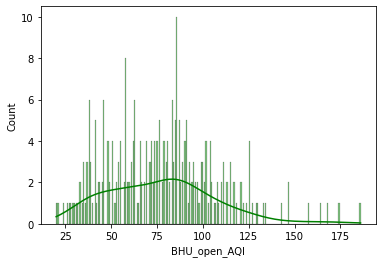

In [24]:

sns.histplot(data=BHU_AQI_Session,x="BHU_open_AQI",bins=261,kde=True,color="green")

<AxesSubplot:xlabel='Lockdown_BHU_Closed_AQI', ylabel='Count'>

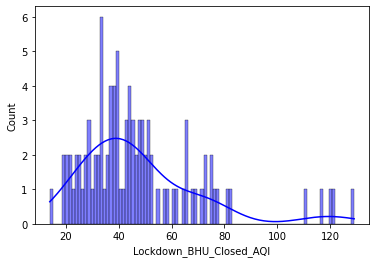

In [25]:
sns.histplot(data=BHU_AQI_Session,x="Lockdown_BHU_Closed_AQI",bins=97,kde=True,color="blue")

<AxesSubplot:xlabel='Unlock_BHU_Closed_AQI', ylabel='Count'>

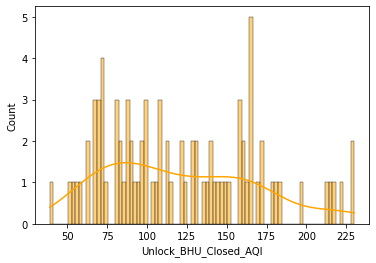

In [26]:
sns.histplot(data=BHU_AQI_Session,x="Unlock_BHU_Closed_AQI",bins=84,kde=True,color="orange")

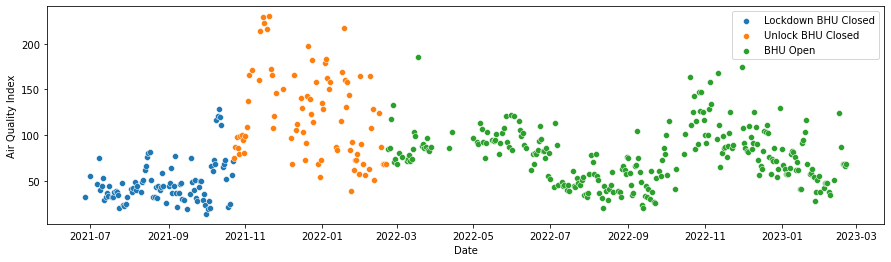

In [27]:
fig, ax = plt.subplots(figsize=(15, 4))
sns.scatterplot(x=BHU_AQI_Session.Lockdown_BHU_Closed,y=BHU_AQI_Session.AQI)
sns.scatterplot(x=BHU_AQI_Session.Unlock_BHU_Closed,y=BHU_AQI_Session.AQI)
sns.scatterplot(x=BHU_AQI_Session.BHU_Open,y=BHU_AQI_Session.AQI)
plt.ylabel("Air Quality Index")
plt.xlabel("Date")
plt.legend(["Lockdown BHU Closed","Unlock BHU Closed","BHU Open"],loc=0)

From above plot we can see that the first unlock phase have significant impact on Air Pollution.

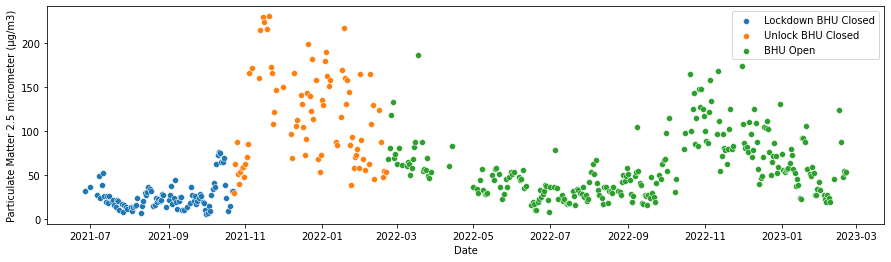

In [28]:
fig, ax = plt.subplots(figsize=(15, 4))
sns.scatterplot(x=BHU_AQI_Session.Lockdown_BHU_Closed,y=BHU_AQI_Session.PM25)
sns.scatterplot(x=BHU_AQI_Session.Unlock_BHU_Closed,y=BHU_AQI_Session.PM25 )
sns.scatterplot(x=BHU_AQI_Session.BHU_Open,y=BHU_AQI_Session.PM25)
plt.ylabel("Particulate Matter 2.5 micrometer (µg/m3)")
plt.xlabel("Date")
plt.legend(["Lockdown BHU Closed","Unlock BHU Closed","BHU Open"],loc=0)

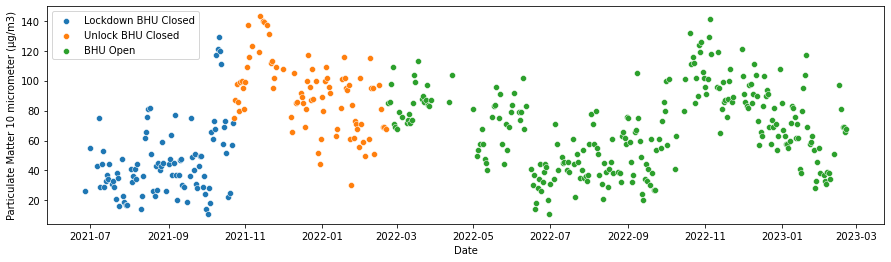

In [29]:
fig, ax = plt.subplots(figsize=(15, 4))
sns.scatterplot(x=BHU_AQI_Session.Lockdown_BHU_Closed,y=BHU_AQI_Session.PM10)
sns.scatterplot(x=BHU_AQI_Session.Unlock_BHU_Closed,y=BHU_AQI_Session.PM10)
sns.scatterplot(x=BHU_AQI_Session.BHU_Open,y=BHU_AQI_Session.PM10)
plt.ylabel("Particulate Matter 10 micrometer (µg/m3)")
plt.xlabel("Date")
plt.legend(["Lockdown BHU Closed","Unlock BHU Closed","BHU Open"],loc=0)

From above three plot we can say that the trend of PM2.5 and PM10 is reflected by AQI, Hence having significantly high correlation amoung these variables.

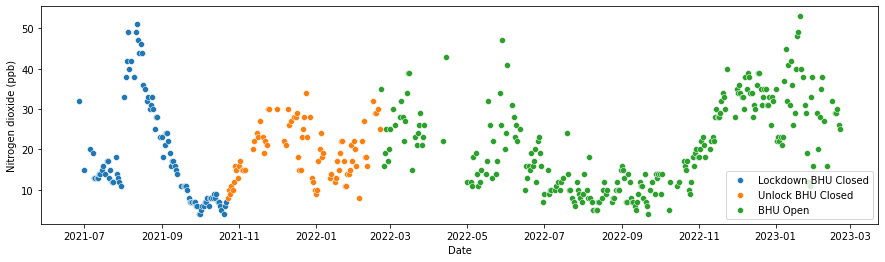

In [30]:
fig, ax = plt.subplots(figsize=(15, 4))
sns.scatterplot(x=BHU_AQI_Session.Lockdown_BHU_Closed,y=BHU_AQI_Session.NO2 )
sns.scatterplot(x=BHU_AQI_Session.Unlock_BHU_Closed,y=BHU_AQI_Session.NO2 )
sns.scatterplot(x=BHU_AQI_Session.BHU_Open,y=BHU_AQI_Session.NO2 )
plt.ylabel("Nitrogen dioxide (ppb)")
plt.xlabel("Date")
plt.legend(["Lockdown BHU Closed","Unlock BHU Closed","BHU Open"],loc=0)

The concentration of Nitrogen dioxide depends on temperature, humidity and also on wind speed so from above plot we can say that its concentration also depends on weather condition rather than only on emmision of pollutants.

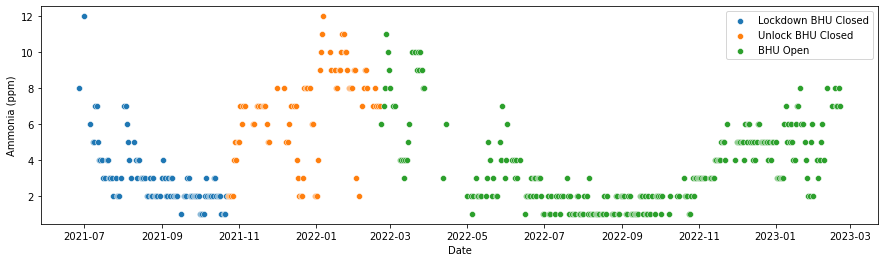

In [31]:
fig, ax = plt.subplots(figsize=(15, 4))
sns.scatterplot(x=BHU_AQI_Session.Lockdown_BHU_Closed,y=BHU_AQI_Session.NH3 )
sns.scatterplot(x=BHU_AQI_Session.Unlock_BHU_Closed,y=BHU_AQI_Session.NH3 )
sns.scatterplot(x=BHU_AQI_Session.BHU_Open,y=BHU_AQI_Session.NH3 )
plt.ylabel("Ammonia (ppm)")
plt.xlabel("Date")
plt.legend(["Lockdown BHU Closed","Unlock BHU Closed","BHU Open"],loc=0)

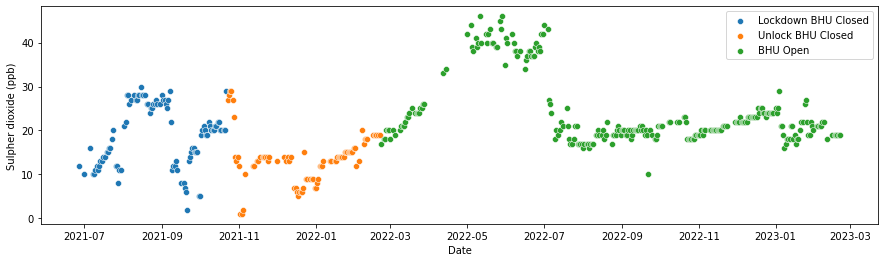

In [32]:
fig, ax = plt.subplots(figsize=(15, 4))
sns.scatterplot(x=BHU_AQI_Session.Lockdown_BHU_Closed,y=BHU_AQI_Session.SO2 )
sns.scatterplot(x=BHU_AQI_Session.Unlock_BHU_Closed,y=BHU_AQI_Session.SO2 )
sns.scatterplot(x=BHU_AQI_Session.BHU_Open,y=BHU_AQI_Session.SO2 )
plt.ylabel("Sulpher dioxide (ppb)")
plt.xlabel("Date")
plt.legend(["Lockdown BHU Closed","Unlock BHU Closed","BHU Open"],loc=0)

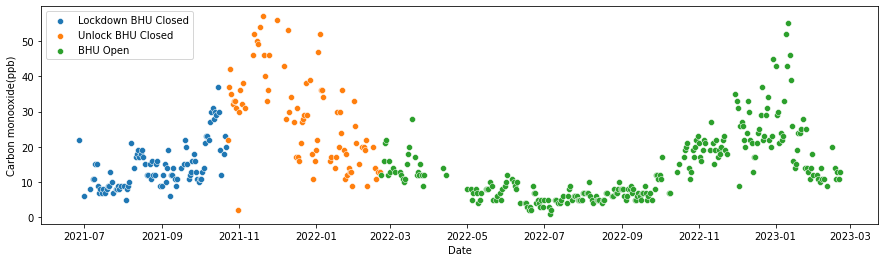

In [33]:
fig, ax = plt.subplots(figsize=(15, 4))
sns.scatterplot(x=BHU_AQI_Session.Lockdown_BHU_Closed,y=BHU_AQI_Session.CO )
sns.scatterplot(x=BHU_AQI_Session.Unlock_BHU_Closed,y=BHU_AQI_Session.CO )
sns.scatterplot(x=BHU_AQI_Session.BHU_Open,y=BHU_AQI_Session.CO )
plt.ylabel("Carbon monooxide(ppb)")
plt.xlabel("Date")
plt.legend(["Lockdown BHU Closed","Unlock BHU Closed","BHU Open"],loc=0)

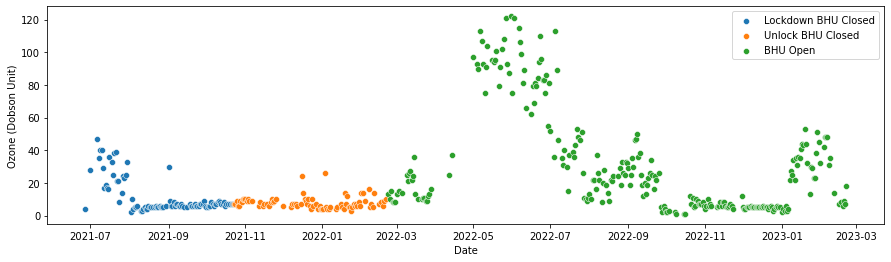

In [34]:
fig, ax = plt.subplots(figsize=(15, 4))
sns.scatterplot(x=BHU_AQI_Session.Lockdown_BHU_Closed,y=BHU_AQI_Session.OZONE)
sns.scatterplot(x=BHU_AQI_Session.Unlock_BHU_Closed,y=BHU_AQI_Session.OZONE )
sns.scatterplot(x=BHU_AQI_Session.BHU_Open,y=BHU_AQI_Session.OZONE )
plt.ylabel("Ozone (Dobson Unit)")
plt.xlabel("Date")
plt.legend(["Lockdown BHU Closed","Unlock BHU Closed","BHU Open"],loc=0)

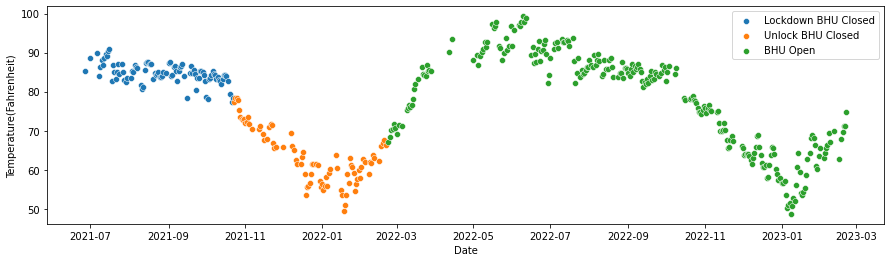

In [35]:
fig, ax = plt.subplots(figsize=(15, 4))
sns.scatterplot(x=BHU_AQI_Session.Lockdown_BHU_Closed,y=BHU_AQI_Session.TEMPERATURE)
sns.scatterplot(x=BHU_AQI_Session.Unlock_BHU_Closed,y=BHU_AQI_Session.TEMPERATURE)
sns.scatterplot(x=BHU_AQI_Session.BHU_Open,y=BHU_AQI_Session.TEMPERATURE)
plt.ylabel("Temperature(Fahrenheit)")
plt.xlabel("Date")
plt.legend(["Lockdown BHU Closed","Unlock BHU Closed","BHU Open"],loc=0)

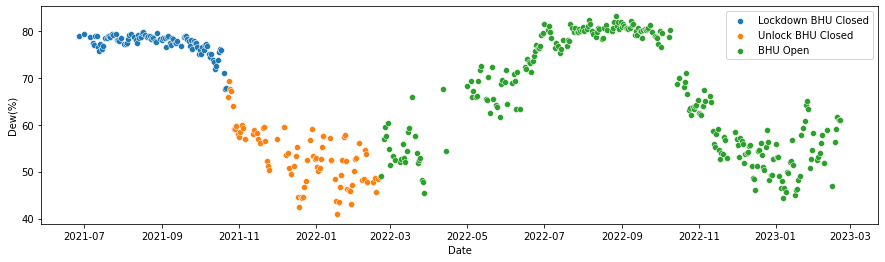

In [36]:
fig, ax = plt.subplots(figsize=(15, 4))
sns.scatterplot(x=BHU_AQI_Session.Lockdown_BHU_Closed,y=BHU_AQI_Session.DEW)
sns.scatterplot(x=BHU_AQI_Session.Unlock_BHU_Closed,y=BHU_AQI_Session.DEW)
sns.scatterplot(x=BHU_AQI_Session.BHU_Open,y=BHU_AQI_Session.DEW)
plt.ylabel("Dew(%)")
plt.xlabel("Date")
plt.legend(["Lockdown BHU Closed","Unlock BHU Closed","BHU Open"],loc=0)

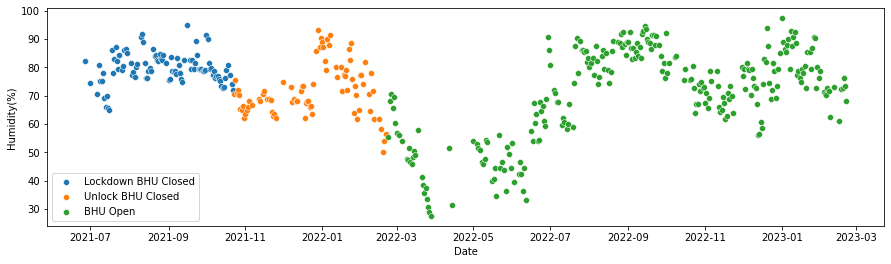

In [37]:
fig, ax = plt.subplots(figsize=(15, 4))
sns.scatterplot(x=BHU_AQI_Session.Lockdown_BHU_Closed,y=BHU_AQI_Session.HUMIDITY)
sns.scatterplot(x=BHU_AQI_Session.Unlock_BHU_Closed,y=BHU_AQI_Session.HUMIDITY)
sns.scatterplot(x=BHU_AQI_Session.BHU_Open,y=BHU_AQI_Session.HUMIDITY)
plt.ylabel("Humidity(%)")
plt.xlabel("Date")
plt.legend(["Lockdown BHU Closed","Unlock BHU Closed","BHU Open"],loc=0)

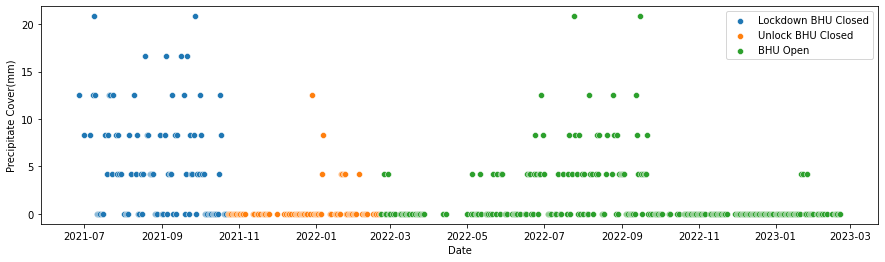

In [38]:
fig, ax = plt.subplots(figsize=(15, 4))
sns.scatterplot(x=BHU_AQI_Session.Lockdown_BHU_Closed,y=BHU_AQI_Session.PRECIP_COVER )
sns.scatterplot(x=BHU_AQI_Session.Unlock_BHU_Closed,y=BHU_AQI_Session.PRECIP_COVER )
sns.scatterplot(x=BHU_AQI_Session.BHU_Open,y=BHU_AQI_Session.PRECIP_COVER )
plt.ylabel("Precipitate Cover(mm)")
plt.xlabel("Date")
plt.legend(["Lockdown BHU Closed","Unlock BHU Closed","BHU Open"],loc=0)

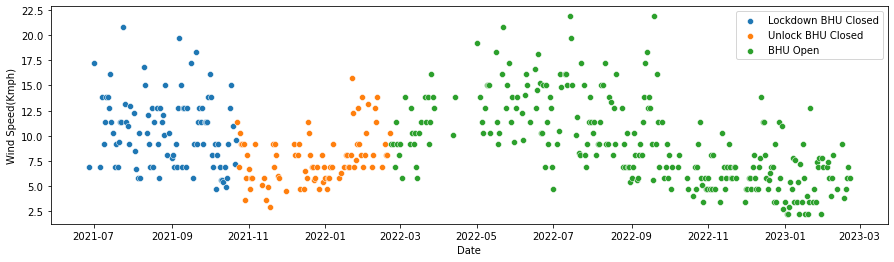

In [39]:
fig, ax = plt.subplots(figsize=(15, 4))
sns.scatterplot(x=BHU_AQI_Session.Lockdown_BHU_Closed,y=BHU_AQI_Session.WIND_SPEED )
sns.scatterplot(x=BHU_AQI_Session.Unlock_BHU_Closed,y=BHU_AQI_Session.WIND_SPEED )
sns.scatterplot(x=BHU_AQI_Session.BHU_Open,y=BHU_AQI_Session.WIND_SPEED )
plt.ylabel("Wind Speed(Kmph)")
plt.xlabel("Date")
plt.legend(["Lockdown BHU Closed","Unlock BHU Closed","BHU Open"],loc=0)

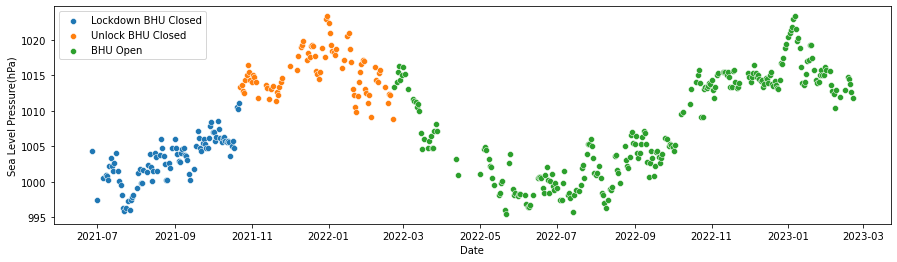

In [40]:
fig, ax = plt.subplots(figsize=(15, 4))
sns.scatterplot(x=BHU_AQI_Session.Lockdown_BHU_Closed,y=BHU_AQI_Session.SEA_LEVEL_PRESSURE)
sns.scatterplot(x=BHU_AQI_Session.Unlock_BHU_Closed,y=BHU_AQI_Session.SEA_LEVEL_PRESSURE)
sns.scatterplot(x=BHU_AQI_Session.BHU_Open,y=BHU_AQI_Session.SEA_LEVEL_PRESSURE)
plt.ylabel("Sea Level Pressure(hPa)")
plt.xlabel("Date")
plt.legend(["Lockdown BHU Closed","Unlock BHU Closed","BHU Open"],loc=0)

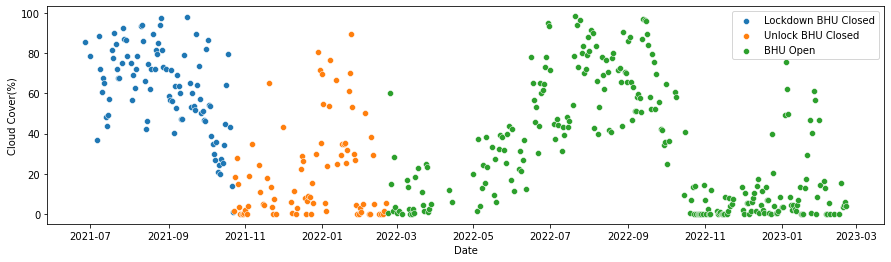

In [41]:
fig, ax = plt.subplots(figsize=(15, 4))
sns.scatterplot(x=BHU_AQI_Session.Lockdown_BHU_Closed,y=BHU_AQI_Session.CLOUD_COVER )
sns.scatterplot(x=BHU_AQI_Session.Unlock_BHU_Closed,y=BHU_AQI_Session.CLOUD_COVER)
sns.scatterplot(x=BHU_AQI_Session.BHU_Open,y=BHU_AQI_Session.CLOUD_COVER)
plt.ylabel("Cloud Cover(%)")
plt.xlabel("Date")
plt.legend(["Lockdown BHU Closed","Unlock BHU Closed","BHU Open"],loc=0)

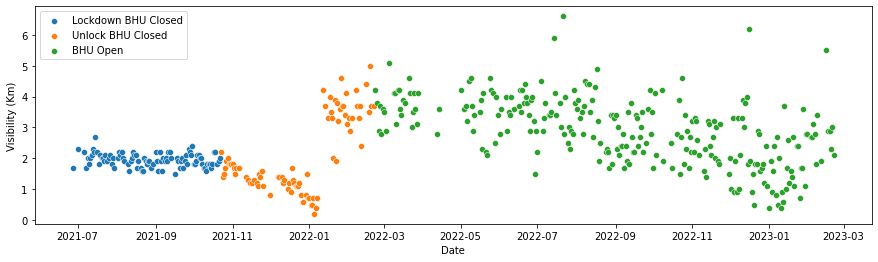

In [42]:
fig, ax = plt.subplots(figsize=(15, 4))
sns.scatterplot(x=BHU_AQI_Session.Lockdown_BHU_Closed,y=BHU_AQI_Session.VISIBILITY)
sns.scatterplot(x=BHU_AQI_Session.Unlock_BHU_Closed,y=BHU_AQI_Session.VISIBILITY )
sns.scatterplot(x=BHU_AQI_Session.BHU_Open,y=BHU_AQI_Session.VISIBILITY)
plt.ylabel("Visibility (Km)")
plt.xlabel("Date")
plt.legend(["Lockdown BHU Closed","Unlock BHU Closed","BHU Open"],loc=0)

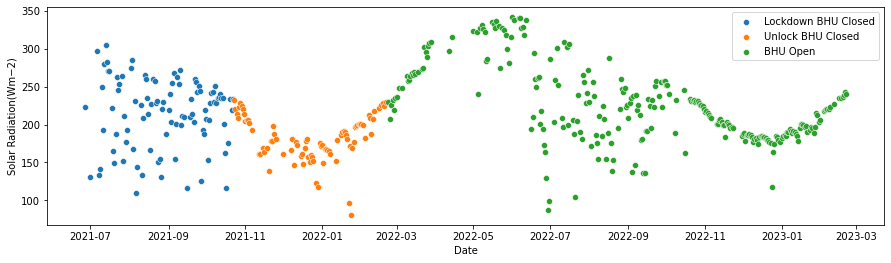

In [43]:
fig, ax = plt.subplots(figsize=(15, 4))
sns.scatterplot(x=BHU_AQI_Session.Lockdown_BHU_Closed,y=BHU_AQI_Session.SOLAR_RADIATION)
sns.scatterplot(x=BHU_AQI_Session.Unlock_BHU_Closed,y=BHU_AQI_Session.SOLAR_RADIATION)
sns.scatterplot(x=BHU_AQI_Session.BHU_Open,y=BHU_AQI_Session.SOLAR_RADIATION)
plt.ylabel("Solar Radiation(Wm−2)")
plt.xlabel("Date")
plt.legend(["Lockdown BHU Closed","Unlock BHU Closed","BHU Open"],loc=0)

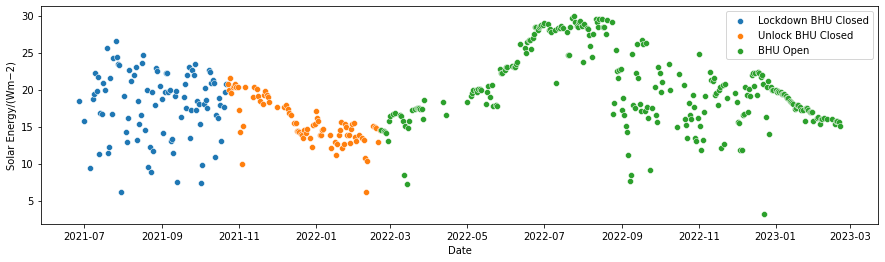

In [44]:
fig, ax = plt.subplots(figsize=(15, 4))
sns.scatterplot(x=BHU_AQI_Session.Lockdown_BHU_Closed,y=BHU_AQI_Session.SOLAR_ENERGY)
sns.scatterplot(x=BHU_AQI_Session.Unlock_BHU_Closed,y=BHU_AQI_Session.SOLAR_ENERGY)
sns.scatterplot(x=BHU_AQI_Session.BHU_Open,y=BHU_AQI_Session.SOLAR_ENERGY)
plt.ylabel("Solar Energy/(Wm−2)")
plt.xlabel("Date")
plt.legend(["Lockdown BHU Closed","Unlock BHU Closed","BHU Open"],loc=0)

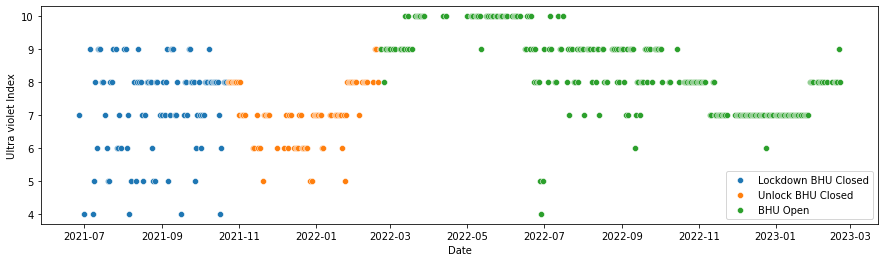

In [45]:
fig, ax = plt.subplots(figsize=(15, 4))
sns.scatterplot(x=BHU_AQI_Session.Lockdown_BHU_Closed,y=BHU_AQI_Session.UV_INDEX)
sns.scatterplot(x=BHU_AQI_Session.Unlock_BHU_Closed,y=BHU_AQI_Session.UV_INDEX)
sns.scatterplot(x=BHU_AQI_Session.BHU_Open,y=BHU_AQI_Session.UV_INDEX)
plt.ylabel("Ultra violet Index")
plt.xlabel("Date")
plt.legend(["Lockdown BHU Closed","Unlock BHU Closed","BHU Open"],loc=0)

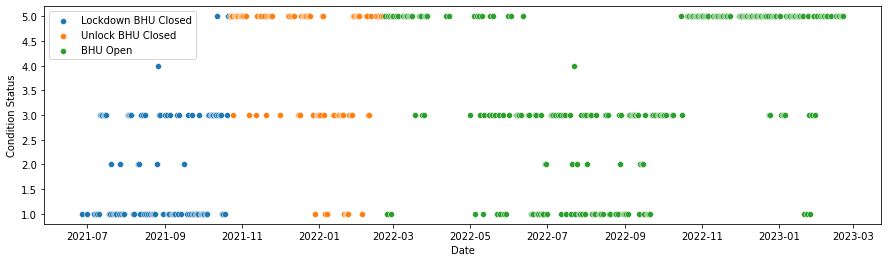

In [46]:
fig, ax = plt.subplots(figsize=(15, 4))
sns.scatterplot(x=BHU_AQI_Session.Lockdown_BHU_Closed,y=BHU_AQI_Session.CONDITION_status)
sns.scatterplot(x=BHU_AQI_Session.Unlock_BHU_Closed,y=BHU_AQI_Session.CONDITION_status )
sns.scatterplot(x=BHU_AQI_Session.BHU_Open,y=BHU_AQI_Session.CONDITION_status)
plt.ylabel("Condition Status")
plt.xlabel("Date")
plt.legend(["Lockdown BHU Closed","Unlock BHU Closed","BHU Open"],loc=0)

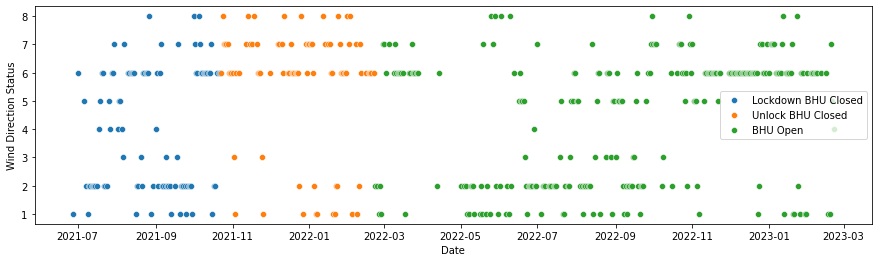

In [47]:
fig, ax = plt.subplots(figsize=(15, 4))
sns.scatterplot(x=BHU_AQI_Session.Lockdown_BHU_Closed,y=BHU_AQI_Session.WIND_DIRECTION_Status )
sns.scatterplot(x=BHU_AQI_Session.Unlock_BHU_Closed,y=BHU_AQI_Session.WIND_DIRECTION_Status)
sns.scatterplot(x=BHU_AQI_Session.BHU_Open,y=BHU_AQI_Session.WIND_DIRECTION_Status)
plt.ylabel("Wind Direction Status")
plt.xlabel("Date")
plt.legend(["Lockdown BHU Closed","Unlock BHU Closed","BHU Open"],loc=0)

# 5. Deducing Predictor and Target Variables

>5.1 Checking for Correlated variables and droping them.

In [48]:
#Defining the Predictor variable
X=BHU_AQI_clean.drop(["DATE","AQI","Unnamed: 0"],axis=1)
#Defining the Target variable
Y=BHU_AQI_clean.AQI
X.head()

PM2.5  PM10  NO2  NH3  SO2  CO  OZONE  TEMPERATURE   DEW  HUMIDITY  ...  \
0     32    26   32    8   12  22      4    29.666667  78.9      82.2  ...   
1     36    55   15   12   10   6     28    31.500000  79.3      74.4  ...   
2     28    43   20    6   16   8     47    32.222222  78.6      70.5  ...   
3     49    75   19    5   10  11     35    28.944444  77.4      80.7  ...   
4     24    29   13    5   10  11     40    30.111111  76.9      75.1  ...   

   SEA_LEVEL_PRESSURE  CLOUD_COVER  VISIBILITY  SOLAR_RADIATION  SOLAR_ENERGY  \
0              1004.3         85.4         1.7            223.7          19.4   
1               997.4         78.7         2.3            130.2          11.3   
2              1000.5         36.6         2.2            296.9          25.6   
3              1001.0         88.6         1.7            133.9          11.4   
4              1000.8         71.9         2.0            141.7          12.2   

   UV_INDEX  DAYLIGHT_DURATION  MOONPHASE  CONDITION_status  \
0         7          13.706111       0.58                 1   
1         4          13.688889       0.71                 1   
2         9          13.655833       0.88                 1   
3         4          13.638889       0.94                 1   
4         5          13.630000       0.97                 1   

   WIND_DIRECTION_Status  
0                      1  
1                      6  
2                      5  
3                      2  
4                      1  

[5 rows x 23 columns]

Checking for strongly correlated variables (correlation>0.8 or <-0.8) and droping those variables from our prediction variable set.

<AxesSubplot:>

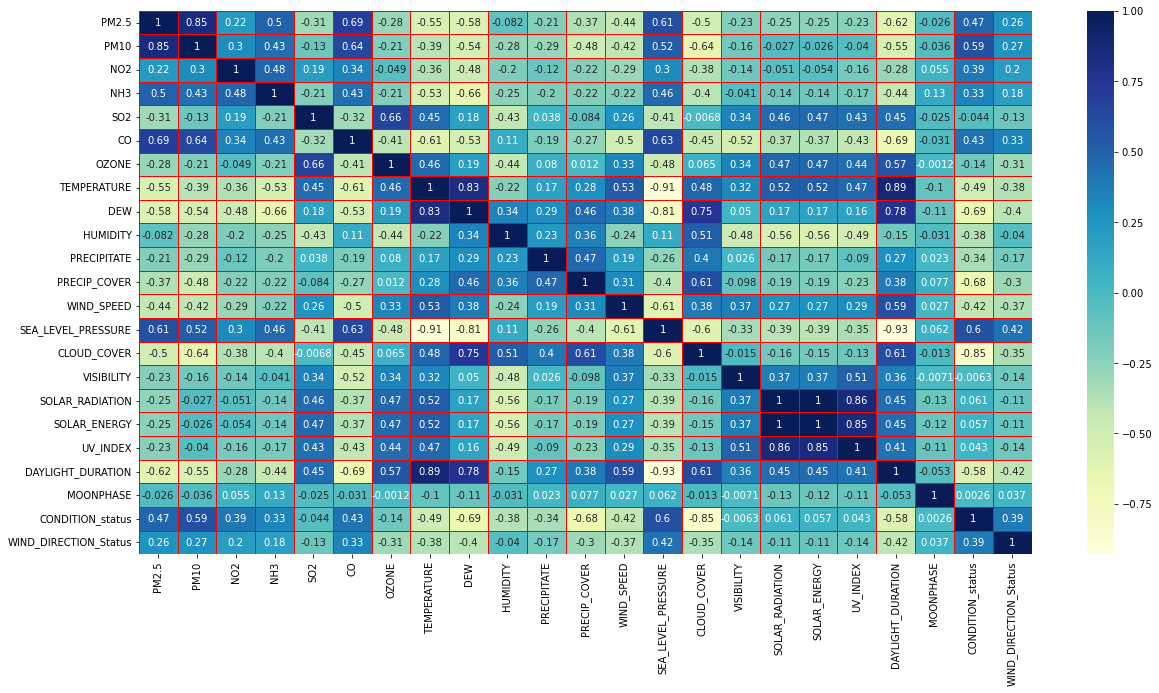

In [49]:
plt.figure(figsize=(20,10))
sns.heatmap(X.corr(), cmap="YlGnBu",annot=True,linewidths=1,linecolor="red")

As we know both PM2.5 and PM10 are important part for estimating Air Quality Index so we can't drop insted of having high correlation, so teansforming them in new Variable named PM-comp.

In [50]:
#Checking for significance importance of both PM values with AQI
np.corrcoef(BHU_AQI_clean['AQI'],BHU_AQI_clean['PM2.5']),np.corrcoef(BHU_AQI_clean['AQI'],BHU_AQI_clean['PM10'])

(array([[1.        , 0.91803175],
        [0.91803175, 1.        ]]),
 array([[1.        , 0.87199781],
        [0.87199781, 1.        ]]))

As both PM variables are almost equaily weighted, so providing them same weightage in transformed variable.

In [51]:
BHU_AQI_clean.insert(0,"PM_comp",BHU_AQI_clean["PM2.5"]*0.5+BHU_AQI_clean["PM10"]*0.5)
BHU_AQI_clean.head(2)

PM_comp  Unnamed: 0       DATE  PM2.5  PM10  NO2  NH3  SO2  CO  OZONE  ...  \
0     29.0           4 2021-06-27     32    26   32    8   12  22      4  ...   
1     45.5           8 2021-07-01     36    55   15   12   10   6     28  ...   

   SEA_LEVEL_PRESSURE  CLOUD_COVER  VISIBILITY  SOLAR_RADIATION  SOLAR_ENERGY  \
0              1004.3         85.4         1.7            223.7          19.4   
1               997.4         78.7         2.3            130.2          11.3   

   UV_INDEX  DAYLIGHT_DURATION  MOONPHASE  CONDITION_status  \
0         7          13.706111       0.58                 1   
1         4          13.688889       0.71                 1   

   WIND_DIRECTION_Status  
0                      1  
1                      6  

[2 rows x 27 columns]

In [52]:
#Defining the Predictor variable
X=BHU_AQI_clean.drop(["DATE","AQI","Unnamed: 0","PM2.5","PM10"],axis=1)
#Defining the Target variable
Y=BHU_AQI_clean.AQI
X.head()

PM_comp  NO2  NH3  SO2  CO  OZONE  TEMPERATURE   DEW  HUMIDITY  \
0     29.0   32    8   12  22      4    29.666667  78.9      82.2   
1     45.5   15   12   10   6     28    31.500000  79.3      74.4   
2     35.5   20    6   16   8     47    32.222222  78.6      70.5   
3     62.0   19    5   10  11     35    28.944444  77.4      80.7   
4     26.5   13    5   10  11     40    30.111111  76.9      75.1   

   PRECIPITATE  ...  SEA_LEVEL_PRESSURE  CLOUD_COVER  VISIBILITY  \
0        0.012  ...              1004.3         85.4         1.7   
1        0.008  ...               997.4         78.7         2.3   
2        0.028  ...              1000.5         36.6         2.2   
3        0.039  ...              1001.0         88.6         1.7   
4        0.044  ...              1000.8         71.9         2.0   

   SOLAR_RADIATION  SOLAR_ENERGY  UV_INDEX  DAYLIGHT_DURATION  MOONPHASE  \
0            223.7          19.4         7          13.706111       0.58   
1            130.2          11.3         4          13.688889       0.71   
2            296.9          25.6         9          13.655833       0.88   
3            133.9          11.4         4          13.638889       0.94   
4            141.7          12.2         5          13.630000       0.97   

   CONDITION_status  WIND_DIRECTION_Status  
0                 1                      1  
1                 1                      6  
2                 1                      5  
3                 1                      2  
4                 1                      1  

[5 rows x 22 columns]

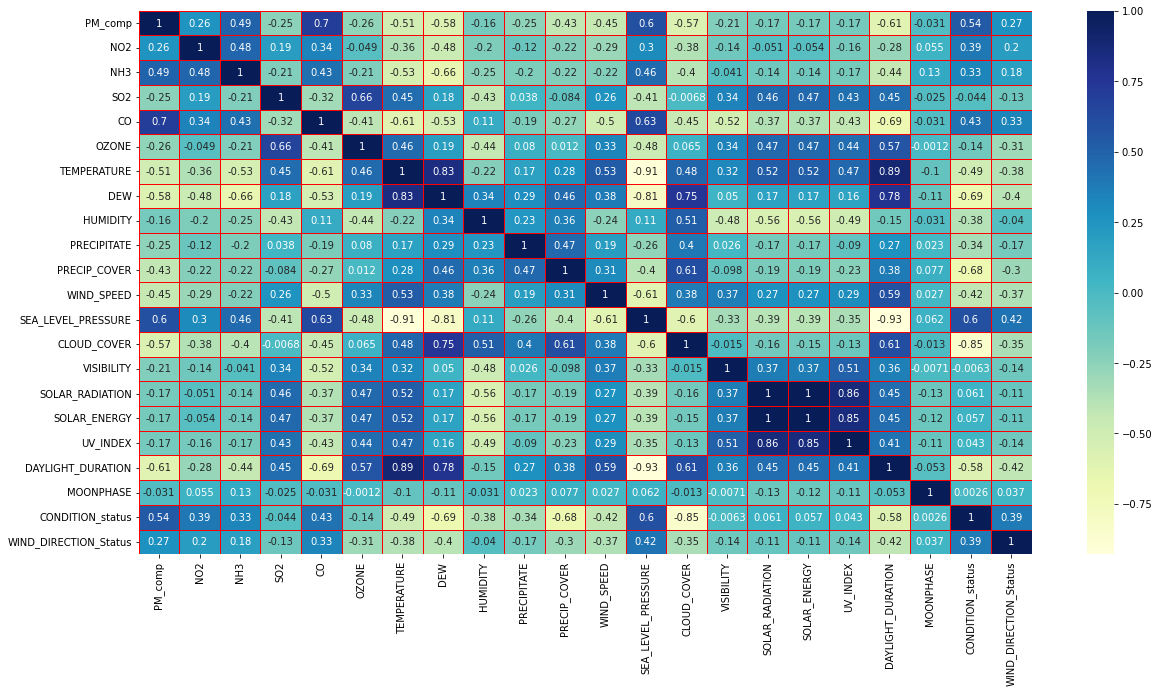

In [53]:
plt.figure(figsize=(20,10))
sns.heatmap(X.corr(), cmap="YlGnBu",annot=True,linewidths=1,linecolor="red")
plt.show()

Its hard to figure our the dropping variables because there are many highly correlated variable

> Checking how many variables are together significant for model formulation

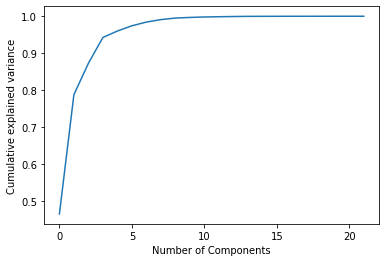

In [54]:
#Explained Variance
pca=PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative explained variance")
plt.show()


Therefore we can see that 11 explanatory variables can explain 95  percent of variability

>5.2 Checking for multicollinearity and dropping the correlated variables using Variance inflation factor

In [55]:
Int=X.astype(int)
VIF= pd.DataFrame()
VIF['feature'] = X.columns
VIF['VIF']= [variance_inflation_factor(Int.values, i) for i in range(X.shape[1])]
VIF

feature          VIF
0                 PM_comp    11.758070
1                     NO2     9.444295
2                     NH3     8.642902
3                     SO2    19.051058
4                      CO    11.100581
5                   OZONE     4.677473
6             TEMPERATURE  1401.390747
7                     DEW  3220.318103
8                HUMIDITY  1080.975193
9             PRECIPITATE     1.264188
10           PRECIP_COVER     3.055903
11             WIND_SPEED    12.159964
12     SEA_LEVEL_PRESSURE   829.396449
13            CLOUD_COVER    17.179848
14             VISIBILITY     9.075108
15        SOLAR_RADIATION  2075.991702
16           SOLAR_ENERGY  1884.363797
17               UV_INDEX   188.783953
18      DAYLIGHT_DURATION   814.802506
19              MOONPHASE     1.061326
20       CONDITION_status    26.497076
21  WIND_DIRECTION_Status     7.369136

Dropping the variable with maximum VIF that is variable ("DEW")

In [56]:
X1=X.drop(["DEW"],axis=1)

Int=X1.astype(int)
VIF= pd.DataFrame()
VIF['feature'] = X1.columns
VIF['VIF']= [variance_inflation_factor(Int.values, i) for i in range(X1.shape[1])]
VIF

feature          VIF
0                 PM_comp    11.755207
1                     NO2     9.410245
2                     NH3     8.493147
3                     SO2    19.028886
4                      CO    11.095939
5                   OZONE     4.608969
6             TEMPERATURE   109.363299
7                HUMIDITY   140.161799
8             PRECIPITATE     1.260931
9            PRECIP_COVER     2.977784
10             WIND_SPEED    12.132821
11     SEA_LEVEL_PRESSURE   737.158314
12            CLOUD_COVER    16.728863
13             VISIBILITY     8.896422
14        SOLAR_RADIATION  2066.729138
15           SOLAR_ENERGY  1869.577445
16               UV_INDEX   186.544889
17      DAYLIGHT_DURATION   787.876444
18              MOONPHASE     1.061326
19       CONDITION_status    25.938207
20  WIND_DIRECTION_Status     7.164772

In [57]:
X2=X.drop(["DEW","SOLAR_RADIATION"],axis=1)
Int=X2.astype(int)
VIF= pd.DataFrame()
VIF['feature'] = X2.columns
VIF['VIF']= [variance_inflation_factor(Int.values, i) for i in range(X2.shape[1])]
VIF

feature         VIF
0                 PM_comp   11.744768
1                     NO2    9.407867
2                     NH3    8.493142
3                     SO2   18.977011
4                      CO   11.088815
5                   OZONE    4.606281
6             TEMPERATURE  108.964402
7                HUMIDITY  139.481245
8             PRECIPITATE    1.257331
9            PRECIP_COVER    2.970005
10             WIND_SPEED   12.107984
11     SEA_LEVEL_PRESSURE  736.108143
12            CLOUD_COVER   16.713099
13             VISIBILITY    8.797370
14           SOLAR_ENERGY   99.529089
15               UV_INDEX  179.283725
16      DAYLIGHT_DURATION  787.756061
17              MOONPHASE    1.060882
18       CONDITION_status   25.929231
19  WIND_DIRECTION_Status    7.104287

In [58]:
X3=X.drop(["DEW","SOLAR_RADIATION","DAYLIGHT_DURATION"],axis=1)
Int=X3.astype(int)
VIF= pd.DataFrame()
VIF['feature'] = X3.columns
VIF['VIF']= [variance_inflation_factor(Int.values, i) for i in range(X3.shape[1])]
VIF

feature         VIF
0                 PM_comp   11.595079
1                     NO2    9.060704
2                     NH3    8.266963
3                     SO2   18.611064
4                      CO   10.953122
5                   OZONE    4.051477
6             TEMPERATURE   57.909276
7                HUMIDITY  137.953173
8             PRECIPITATE    1.248300
9            PRECIP_COVER    2.934760
10             WIND_SPEED   11.726178
11     SEA_LEVEL_PRESSURE  491.502602
12            CLOUD_COVER   15.284719
13             VISIBILITY    8.724897
14           SOLAR_ENERGY   98.963138
15               UV_INDEX  178.613713
16              MOONPHASE    1.056741
17       CONDITION_status   25.271078
18  WIND_DIRECTION_Status    7.093933

In [59]:
X4=X.drop(["DEW","SOLAR_RADIATION","DAYLIGHT_DURATION","SEA_LEVEL_PRESSURE"],axis=1)
Int=X4.astype(int)
VIF= pd.DataFrame()
VIF['feature'] = X4.columns
VIF['VIF']= [variance_inflation_factor(Int.values, i) for i in range(X4.shape[1])]
VIF

feature         VIF
0                 PM_comp   11.303738
1                     NO2    8.888920
2                     NH3    7.013972
3                     SO2   18.552421
4                      CO   10.584752
5                   OZONE    3.887521
6             TEMPERATURE   46.766615
7                HUMIDITY   52.672685
8             PRECIPITATE    1.243216
9            PRECIP_COVER    2.813238
10             WIND_SPEED   10.372130
11            CLOUD_COVER   15.192953
12             VISIBILITY    8.176921
13           SOLAR_ENERGY   98.957285
14               UV_INDEX  168.259284
15              MOONPHASE    1.053929
16       CONDITION_status   21.564508
17  WIND_DIRECTION_Status    6.614877

In [60]:
X5=X.drop(["DEW","SOLAR_RADIATION","DAYLIGHT_DURATION","SEA_LEVEL_PRESSURE",
                      "UV_INDEX"],axis=1)
Int=X5.astype(int)
VIF= pd.DataFrame()
VIF['feature'] = X5.columns
VIF['VIF']= [variance_inflation_factor(Int.values, i) for i in range(X5.shape[1])]
VIF

feature        VIF
0                 PM_comp  11.129337
1                     NO2   8.713693
2                     NH3   6.969419
3                     SO2  18.393718
4                      CO  10.515090
5                   OZONE   3.877313
6             TEMPERATURE  46.400041
7                HUMIDITY  40.459304
8             PRECIPITATE   1.236186
9            PRECIP_COVER   2.757001
10             WIND_SPEED  10.117727
11            CLOUD_COVER  14.990237
12             VISIBILITY   7.305358
13           SOLAR_ENERGY  41.557570
14              MOONPHASE   1.052613
15       CONDITION_status  21.547374
16  WIND_DIRECTION_Status   6.611888

In [61]:
X6=X.drop(["DEW","SOLAR_RADIATION","DAYLIGHT_DURATION","SEA_LEVEL_PRESSURE",
                      "UV_INDEX","TEMPERATURE"],axis=1)
Int=X6.astype(int)
VIF= pd.DataFrame()
VIF['feature'] = X6.columns
VIF['VIF']= [variance_inflation_factor(Int.values, i) for i in range(X6.shape[1])]
VIF

feature        VIF
0                 PM_comp  10.941072
1                     NO2   8.628777
2                     NH3   6.412061
3                     SO2  17.420872
4                      CO  10.489751
5                   OZONE   3.876901
6                HUMIDITY  40.128714
7             PRECIPITATE   1.236155
8            PRECIP_COVER   2.684418
9              WIND_SPEED   9.707122
10            CLOUD_COVER  12.358404
11             VISIBILITY   7.220982
12           SOLAR_ENERGY  25.957670
13              MOONPHASE   1.044209
14       CONDITION_status  21.040559
15  WIND_DIRECTION_Status   6.599226

In [62]:
X7=X.drop(["DEW","SOLAR_RADIATION","DAYLIGHT_DURATION","SEA_LEVEL_PRESSURE",
                      "UV_INDEX","TEMPERATURE","HUMIDITY"],axis=1)
Int=X7.astype(int)
VIF= pd.DataFrame()
VIF['feature'] = X7.columns
VIF['VIF']= [variance_inflation_factor(Int.values, i) for i in range(X7.shape[1])]
VIF

feature        VIF
0                 PM_comp  10.896370
1                     NO2   8.627689
2                     NH3   6.391098
3                     SO2  17.400404
4                      CO   9.641874
5                   OZONE   3.739839
6             PRECIPITATE   1.236145
7            PRECIP_COVER   2.490229
8              WIND_SPEED   9.604574
9             CLOUD_COVER   5.273164
10             VISIBILITY   7.208443
11           SOLAR_ENERGY  24.247483
12              MOONPHASE   1.043487
13       CONDITION_status  15.635005
14  WIND_DIRECTION_Status   6.511280

In [63]:
X_final=X.drop(["DEW","SOLAR_RADIATION","DAYLIGHT_DURATION","SEA_LEVEL_PRESSURE",
                      "UV_INDEX","TEMPERATURE","HUMIDITY","SOLAR_ENERGY"],axis=1)
Int=X_final.astype(int)
VIF= pd.DataFrame()
VIF['feature'] = X_final.columns
VIF['VIF']= [variance_inflation_factor(Int.values, i) for i in range(X_final.shape[1])]
VIF

feature        VIF
0                 PM_comp  10.731261
1                     NO2   8.601273
2                     NH3   6.381217
3                     SO2  15.680389
4                      CO   9.617660
5                   OZONE   3.664622
6             PRECIPITATE   1.182719
7            PRECIP_COVER   2.467156
8              WIND_SPEED   8.870698
9             CLOUD_COVER   4.923067
10             VISIBILITY   7.046403
11              MOONPHASE   1.043410
12       CONDITION_status  13.580909
13  WIND_DIRECTION_Status   6.409448

Continuing the process of eliminating or dropping the variables untill thr VIF of variables is less than 20

We can use the variables with VIF less than 20 in building a regression model

In [64]:
X_FINAL=X_final.drop(["MOONPHASE","PRECIPITATE"],axis=1)
X_FINAL.columns

Index(['PM_comp', 'NO2', 'NH3', 'SO2', 'CO', 'OZONE', 'PRECIP_COVER',
       'WIND_SPEED', 'CLOUD_COVER', 'VISIBILITY', 'CONDITION_status',
       'WIND_DIRECTION_Status'],
      dtype='object')

# 6. Model Building

In [65]:
x_train, x_test, y_train, y_test = train_test_split(X_FINAL,Y, test_size=0.15, random_state=0)

In [66]:
x_train_sm=sm.add_constant(x_train)

In [67]:
x_train_sm

const  PM_comp  NO2  NH3  SO2  CO  OZONE  PRECIP_COVER  WIND_SPEED  \
141    1.0     49.0   12    6    9  11      6          0.00         5.4   
186    1.0     71.5   20    9   20  16      8          0.00         8.1   
441    1.0     60.5   25    7   19  13     18          0.00         5.8   
90     1.0     69.0    7    2   22  37      8          0.00         5.8   
59     1.0     36.5   16    2   12  11      7          8.33        12.8   
..     ...      ...  ...  ...  ...  ..    ...           ...         ...   
323    1.0     47.5   10    1   20   7     22          0.00         6.9   
192    1.0     70.5   28    4   21  11     26          0.00        10.3   
117    1.0    142.0   19    7   14  46      8          0.00         6.9   
47     1.0     36.5   28    2   26  16      5          0.00         8.1   
172    1.0    140.0   27    8   17  20      5          0.00         8.1   

     CLOUD_COVER  VISIBILITY  CONDITION_status  WIND_DIRECTION_Status  
141         71.8         1.5                 3                      6  
186          3.3         3.6                 5                      7  
441          3.7         2.1                 5                      4  
90          34.4         1.7                 3                      7  
59          47.2         2.2                 1                      2  
..           ...         ...               ...                    ...  
323         69.6         2.2                 3                      2  
192          2.5         3.1                 5                      6  
117         13.5         1.1                 5                      6  
47          73.0         1.7                 3                      1  
172          0.0         3.7                 5                      1  

[375 rows x 13 columns]

# Method 1:Fitting a Linear regression model using ordinary least square method

In [68]:
lr=sm.OLS(y_train,x_train_sm).fit()
lr

In [69]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    AQI   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     525.0
Date:                Sat, 22 Apr 2023   Prob (F-statistic):          1.49e-220
Time:                        12:05:14   Log-Likelihood:                -1377.2
No. Observations:                 375   AIC:                             2780.
Df Residuals:                     362   BIC:                             2831.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -21.93

In [70]:
#Checking wether our model is significant or not
1.49e-220<0.05

True

# Method 2: Using Multiple Linear Regression

In [71]:
#Other way to fit model 
x_train, x_test, y_train, y_test = train_test_split(X_FINAL,Y, test_size=0.15, random_state=0)
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
train_accuracy=Lin_reg.score(x_train,y_train)
test_accuracy=Lin_reg.score(x_test,y_test)
print(Lin_reg.score(x_train, y_train))
print(Lin_reg.score(x_test, y_test))


-21.937488445489095
[ 1.09734313 -0.16656863  0.62840198  0.35216351  0.44972472  0.37906451
  0.03069609  0.45359676  0.08356036  0.29800233 -0.79378935  0.49830492]
0.9456648980450031
0.9627008670959885


As we can see both provide same regression equation as MLR also uses principal of OLS

   AQI= -21.937488445489095 + 1.09734313*PM_comp -0.16656863*NO2 +  0.62840198*NH3 + 0.35216351*SO2 + 0.44972472*CO
    + 0.37906451*OZONE + 0.03069609*PRECIP_COVER + 0.45359676*WIND_SPEED + 0.08356036*CLOUD_COVER + 0.29800233*VISIBILITY
    -0.7937893*CONDITION_status + 0.49830492*WIND_DIRECTION_status

In [72]:
BHU_AQI_clean.columns

Index(['PM_comp', 'Unnamed: 0', 'DATE', 'PM2.5', 'PM10', 'NO2', 'NH3', 'SO2',
       'CO', 'OZONE', 'AQI', 'TEMPERATURE', 'DEW', 'HUMIDITY', 'PRECIPITATE',
       'PRECIP_COVER', 'WIND_SPEED', 'SEA_LEVEL_PRESSURE', 'CLOUD_COVER',
       'VISIBILITY', 'SOLAR_RADIATION', 'SOLAR_ENERGY', 'UV_INDEX',
       'DAYLIGHT_DURATION', 'MOONPHASE', 'CONDITION_status',
       'WIND_DIRECTION_Status'],
      dtype='object')

In [73]:
BHU_AQI_clean=BHU_AQI_clean.drop(['Unnamed: 0', 'PM10', 'PM2.5','TEMPERATURE', 'DEW', 'HUMIDITY', 'SEA_LEVEL_PRESSURE'
                              , 'SOLAR_RADIATION', 'SOLAR_ENERGY', 'UV_INDEX','DAYLIGHT_DURATION','MOONPHASE',
                                 'PRECIPITATE'],axis=1)
BHU_AQI_clean.columns

Index(['PM_comp', 'DATE', 'NO2', 'NH3', 'SO2', 'CO', 'OZONE', 'AQI',
       'PRECIP_COVER', 'WIND_SPEED', 'CLOUD_COVER', 'VISIBILITY',
       'CONDITION_status', 'WIND_DIRECTION_Status'],
      dtype='object')

In [74]:
#Inserting a new column named as Predicted_AQI
BHU_AQI_clean.insert(7,"Predicted_AQI",-21.937488445489095 + 1.09734313*(BHU_AQI_clean['PM_comp']) -0.16656863*(BHU_AQI_clean['NO2']) + 0.62840198*(BHU_AQI_clean['NH3']) + 0.35216351*(BHU_AQI_clean['SO2']) + 0.44972472*(BHU_AQI_clean['CO']) + 0.37906451*(BHU_AQI_clean['OZONE']) +0.03069609*(BHU_AQI_clean['PRECIP_COVER']) + 0.45359676*(BHU_AQI_clean['WIND_SPEED']) + 0.08356036*(BHU_AQI_clean['CLOUD_COVER']) + 0.29800233*(BHU_AQI_clean['VISIBILITY']) -0.7937893*(BHU_AQI_clean['CONDITION_status']) + 0.49830492*(BHU_AQI_clean['WIND_DIRECTION_Status']))

In [75]:
BHU_AQI_clean.columns

Index(['PM_comp', 'DATE', 'NO2', 'NH3', 'SO2', 'CO', 'OZONE', 'Predicted_AQI',
       'AQI', 'PRECIP_COVER', 'WIND_SPEED', 'CLOUD_COVER', 'VISIBILITY',
       'CONDITION_status', 'WIND_DIRECTION_Status'],
      dtype='object')

In [76]:
lin=BHU_AQI_clean.drop(["Predicted_AQI","DATE"],axis=1)
lin.head()

PM_comp  NO2  NH3  SO2  CO  OZONE  AQI  PRECIP_COVER  WIND_SPEED  \
0     29.0   32    8   12  22      4   32         12.50         6.9   
1     45.5   15   12   10   6     28   55          8.33        17.2   
2     35.5   20    6   16   8     47   47          8.33         6.9   
3     62.0   19    5   10  11     35   75         12.50        13.9   
4     26.5   13    5   10  11     40   40         20.83         9.2   

   CLOUD_COVER  VISIBILITY  CONDITION_status  WIND_DIRECTION_Status  
0         85.4         1.7                 1                      1  
1         78.7         2.3                 1                      6  
2         36.6         2.2                 1                      5  
3         88.6         1.7                 1                      2  
4         71.9         2.0                 1                      1

Text(0.5, 1, 'scatter plot')

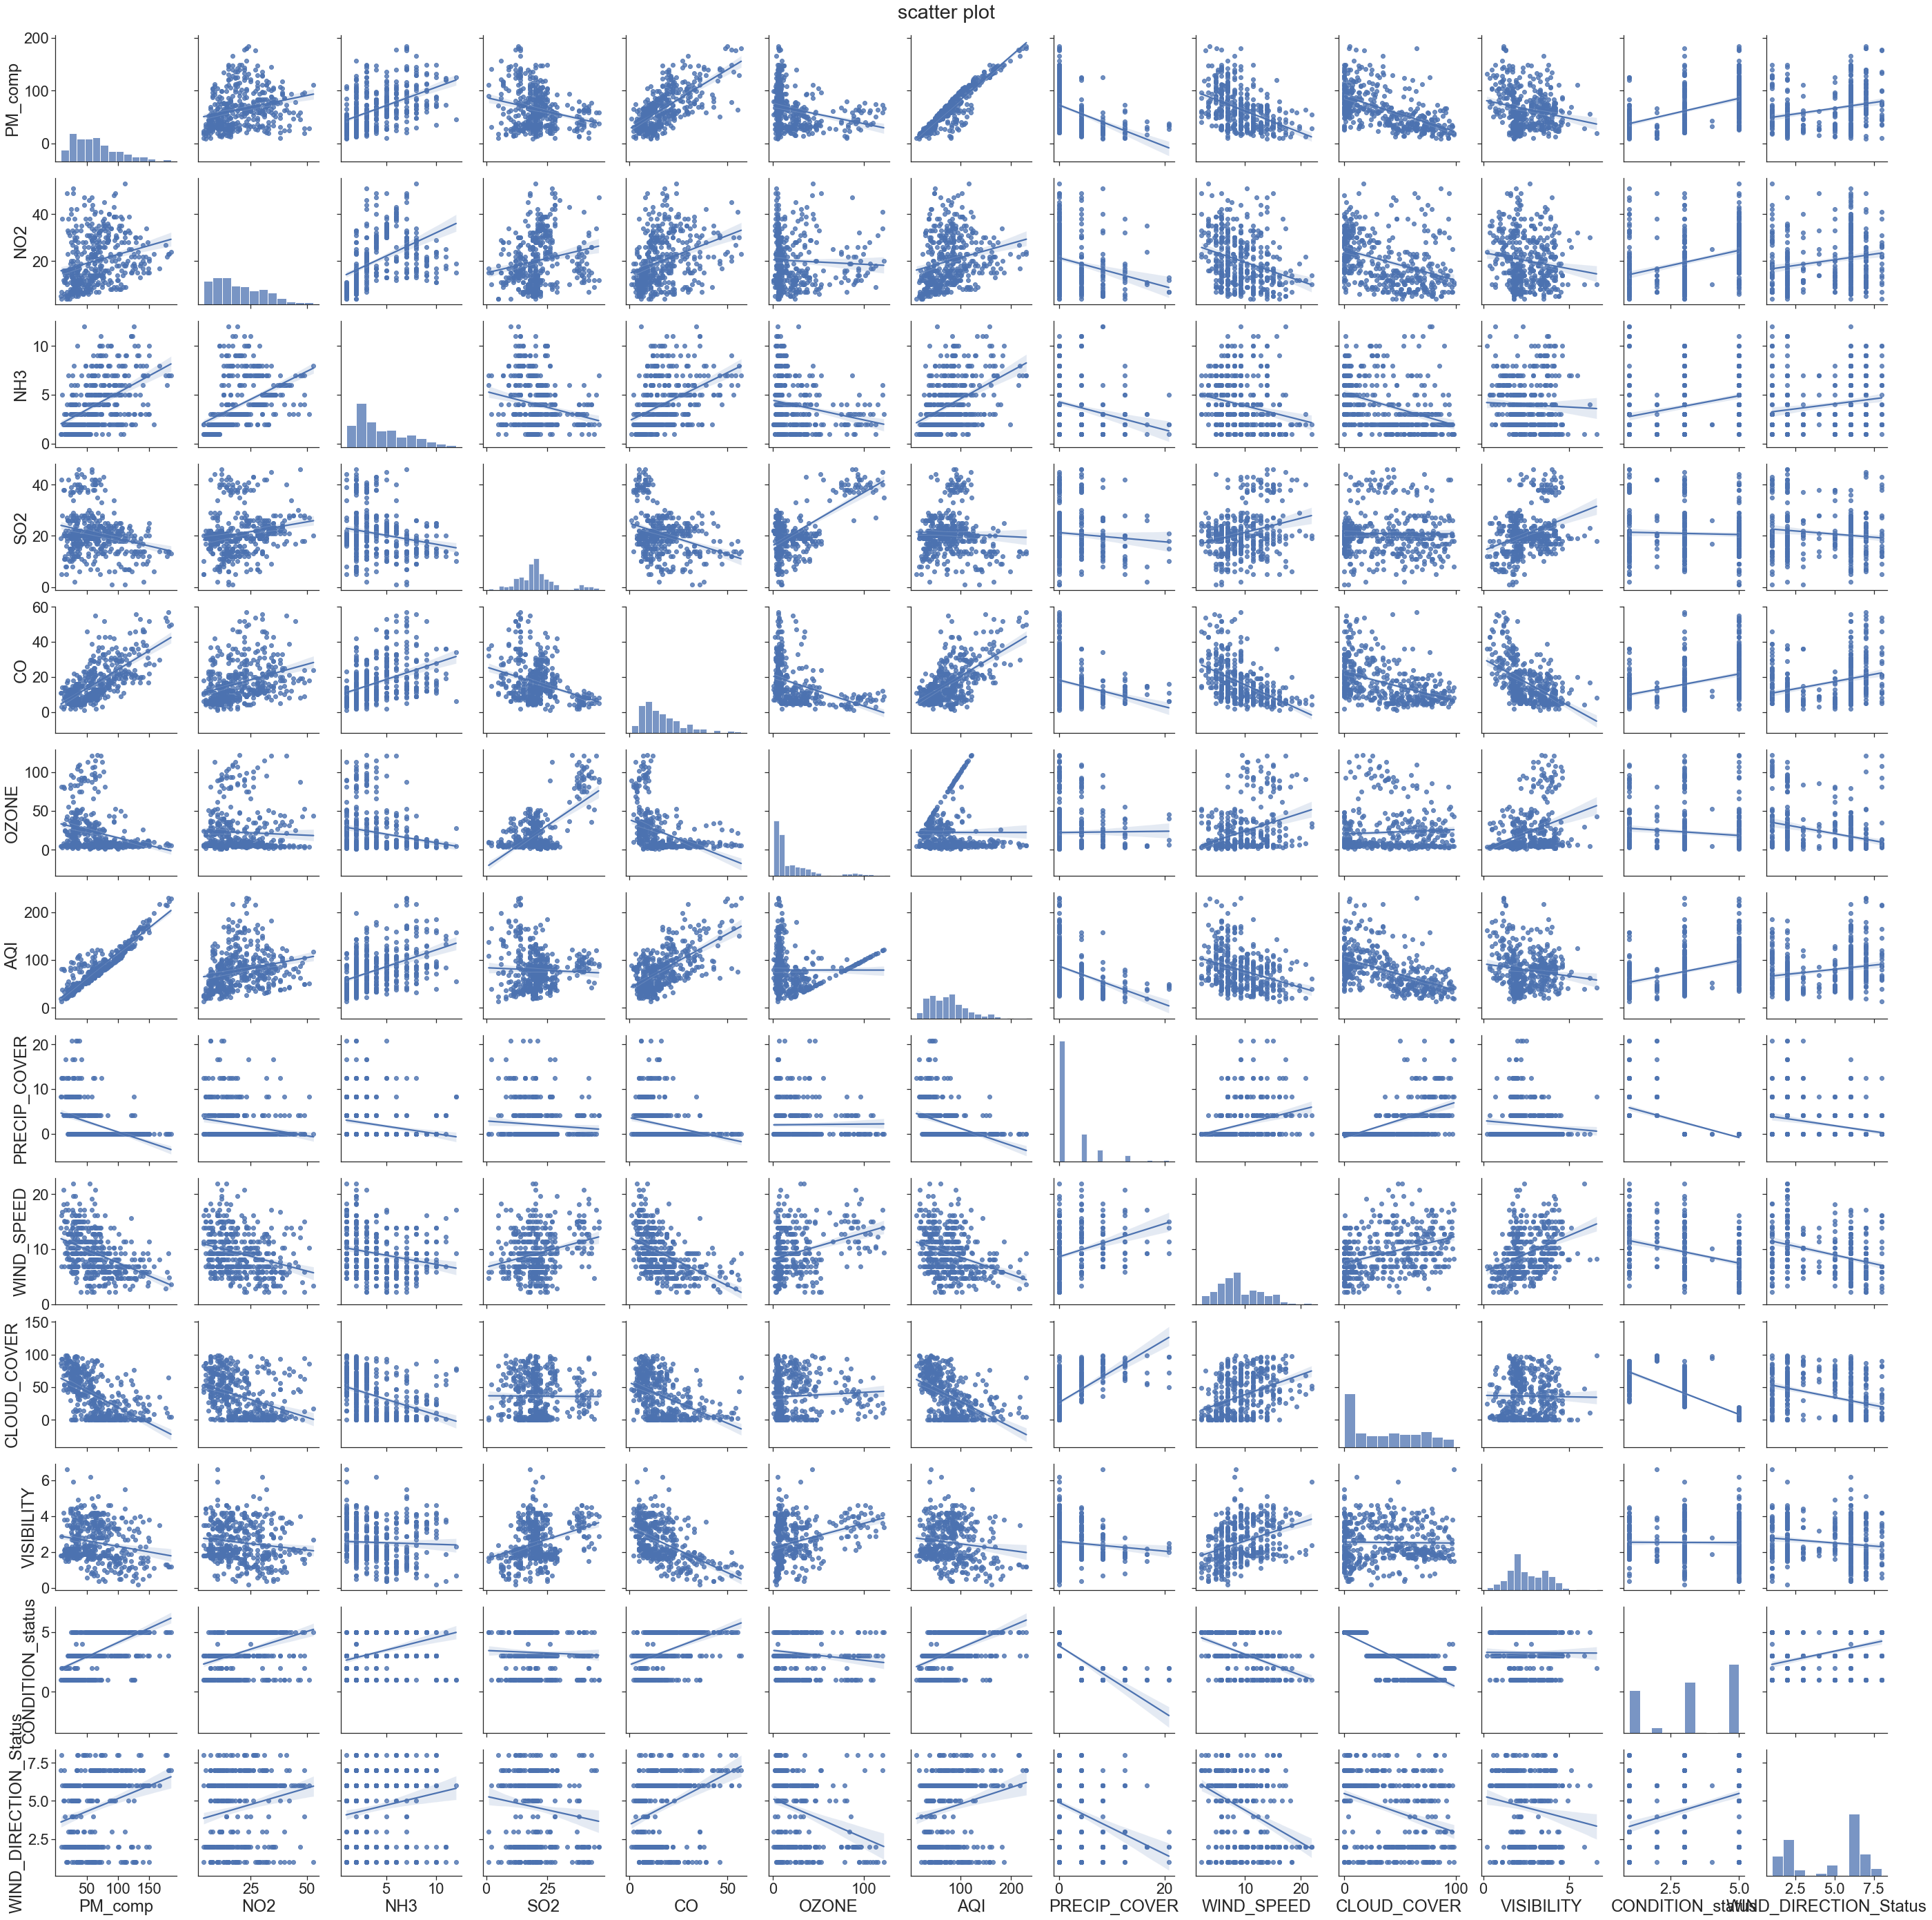

In [77]:
#Using scatter plot for determining Linearity
sns.set(style='ticks',color_codes=True,font_scale=2)
pl0t=sns.pairplot(lin,height=3,palette='Accent',diag_kind='hist',kind='reg')
pl0t.fig.suptitle('scatter plot',y=1)

In [78]:
AQI_Predicted=Lin_reg.predict(x_test)

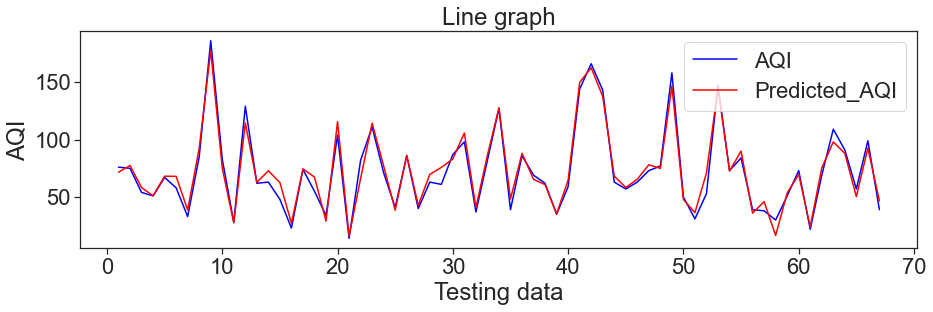

In [79]:
x= np.arange(1, 68)
y1 = y_test
y2 = AQI_Predicted
plt.figure(figsize=(15,4))
plt.title("Line graph")
plt.ylabel("AQI")
plt.xlabel("Testing data")
plt.plot(x, y1, color ="blue")
plt.plot(x, y2, color ="red")
plt.legend(["AQI","Predicted_AQI"],loc=0)
plt.show()

In [80]:
#Correlation between AQI and Predicted AQI
np.corrcoef(AQI_Predicted,y_test)

array([[1.       , 0.9823246],
       [0.9823246, 1.       ]])

In [81]:
BHU_AQI_clean=BHU_AQI_clean.drop([ 'PM_comp', 'NO2', 'NH3', 'SO2', 'CO', 'OZONE',
        'PRECIP_COVER', 'WIND_SPEED', 'CLOUD_COVER',
       'VISIBILITY', 'CONDITION_status', 'WIND_DIRECTION_Status'],axis=1)
BHU_AQI_clean.columns

Index(['DATE', 'Predicted_AQI', 'AQI'], dtype='object')

In [82]:
#Inserting a column named as Residual
BHU_AQI_clean.insert(3,"Residual",(BHU_AQI_clean["AQI"])-(BHU_AQI_clean["Predicted_AQI"]))
BHU_AQI_clean.head(2)

DATE  Predicted_AQI  AQI   Residual
0 2021-06-27      36.079339   32  -4.079339
1 2021-07-01      67.382917   55 -12.382917

In [83]:
#Inserting a column of squared residual named as Residual_sq
BHU_AQI_clean.insert(4,"Residual_sq",BHU_AQI_clean["Residual"]*BHU_AQI_clean["Residual"])
BHU_AQI_clean.head(2)

DATE  Predicted_AQI  AQI   Residual  Residual_sq
0 2021-06-27      36.079339   32  -4.079339    16.641007
1 2021-07-01      67.382917   55 -12.382917   153.336623

In [84]:
Predicted=BHU_AQI_clean.to_excel(r'E:\\Project\final.xlsx',index=False)

In [85]:
Predicted=pd.read_excel("final.xlsx")

In [86]:
Predicted.head(2)

DATE  Predicted_AQI  AQI   Residual  Residual_sq
0 2021-06-27      36.079339   32  -4.079339    16.641007
1 2021-07-01      67.382917   55 -12.382917   153.336623

In [87]:
df=pd.DataFrame([["Mean",Predicted.loc[:,"AQI"].mean(),Predicted.loc[:,"Predicted_AQI"].mean(),Predicted.loc[:,"Residual"].mean()],
                 ["Standard Deviation",Predicted.loc[:,"AQI"].std(),Predicted.loc[:,"Predicted_AQI"].std(),Predicted.loc[:,"Residual"].std()],
                ],columns=["","AQI","Predicted_AQI","Residual"])
df

AQI  Predicted_AQI  Residual
0                Mean  79.122172      79.323754 -0.201582
1  Standard Deviation  40.345206      39.106242  9.193566

In [88]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(BHU_AQI_clean['Predicted_AQI'],BHU_AQI_clean['AQI']))
print(rmse)

9.185371917189162


Hence our Multiple Linear Regression Model is optimal

# 7. Verifying Assumption of Multiple Linear Regression

Assumptions are-
1. Linearity (A linear relationship between dependent and independent variables)
2. Multicollinearity (The independent variables are not highly correlated with each other)
3. Normality of residuals
4. Independence of residuals (no autocorrelation)
5. Homoskedasticity (The variance of residuals is constant)

>1. Linearity (A linear relationship between dependent and independent variables)

Text(0.5, 1, 'scatter plot')

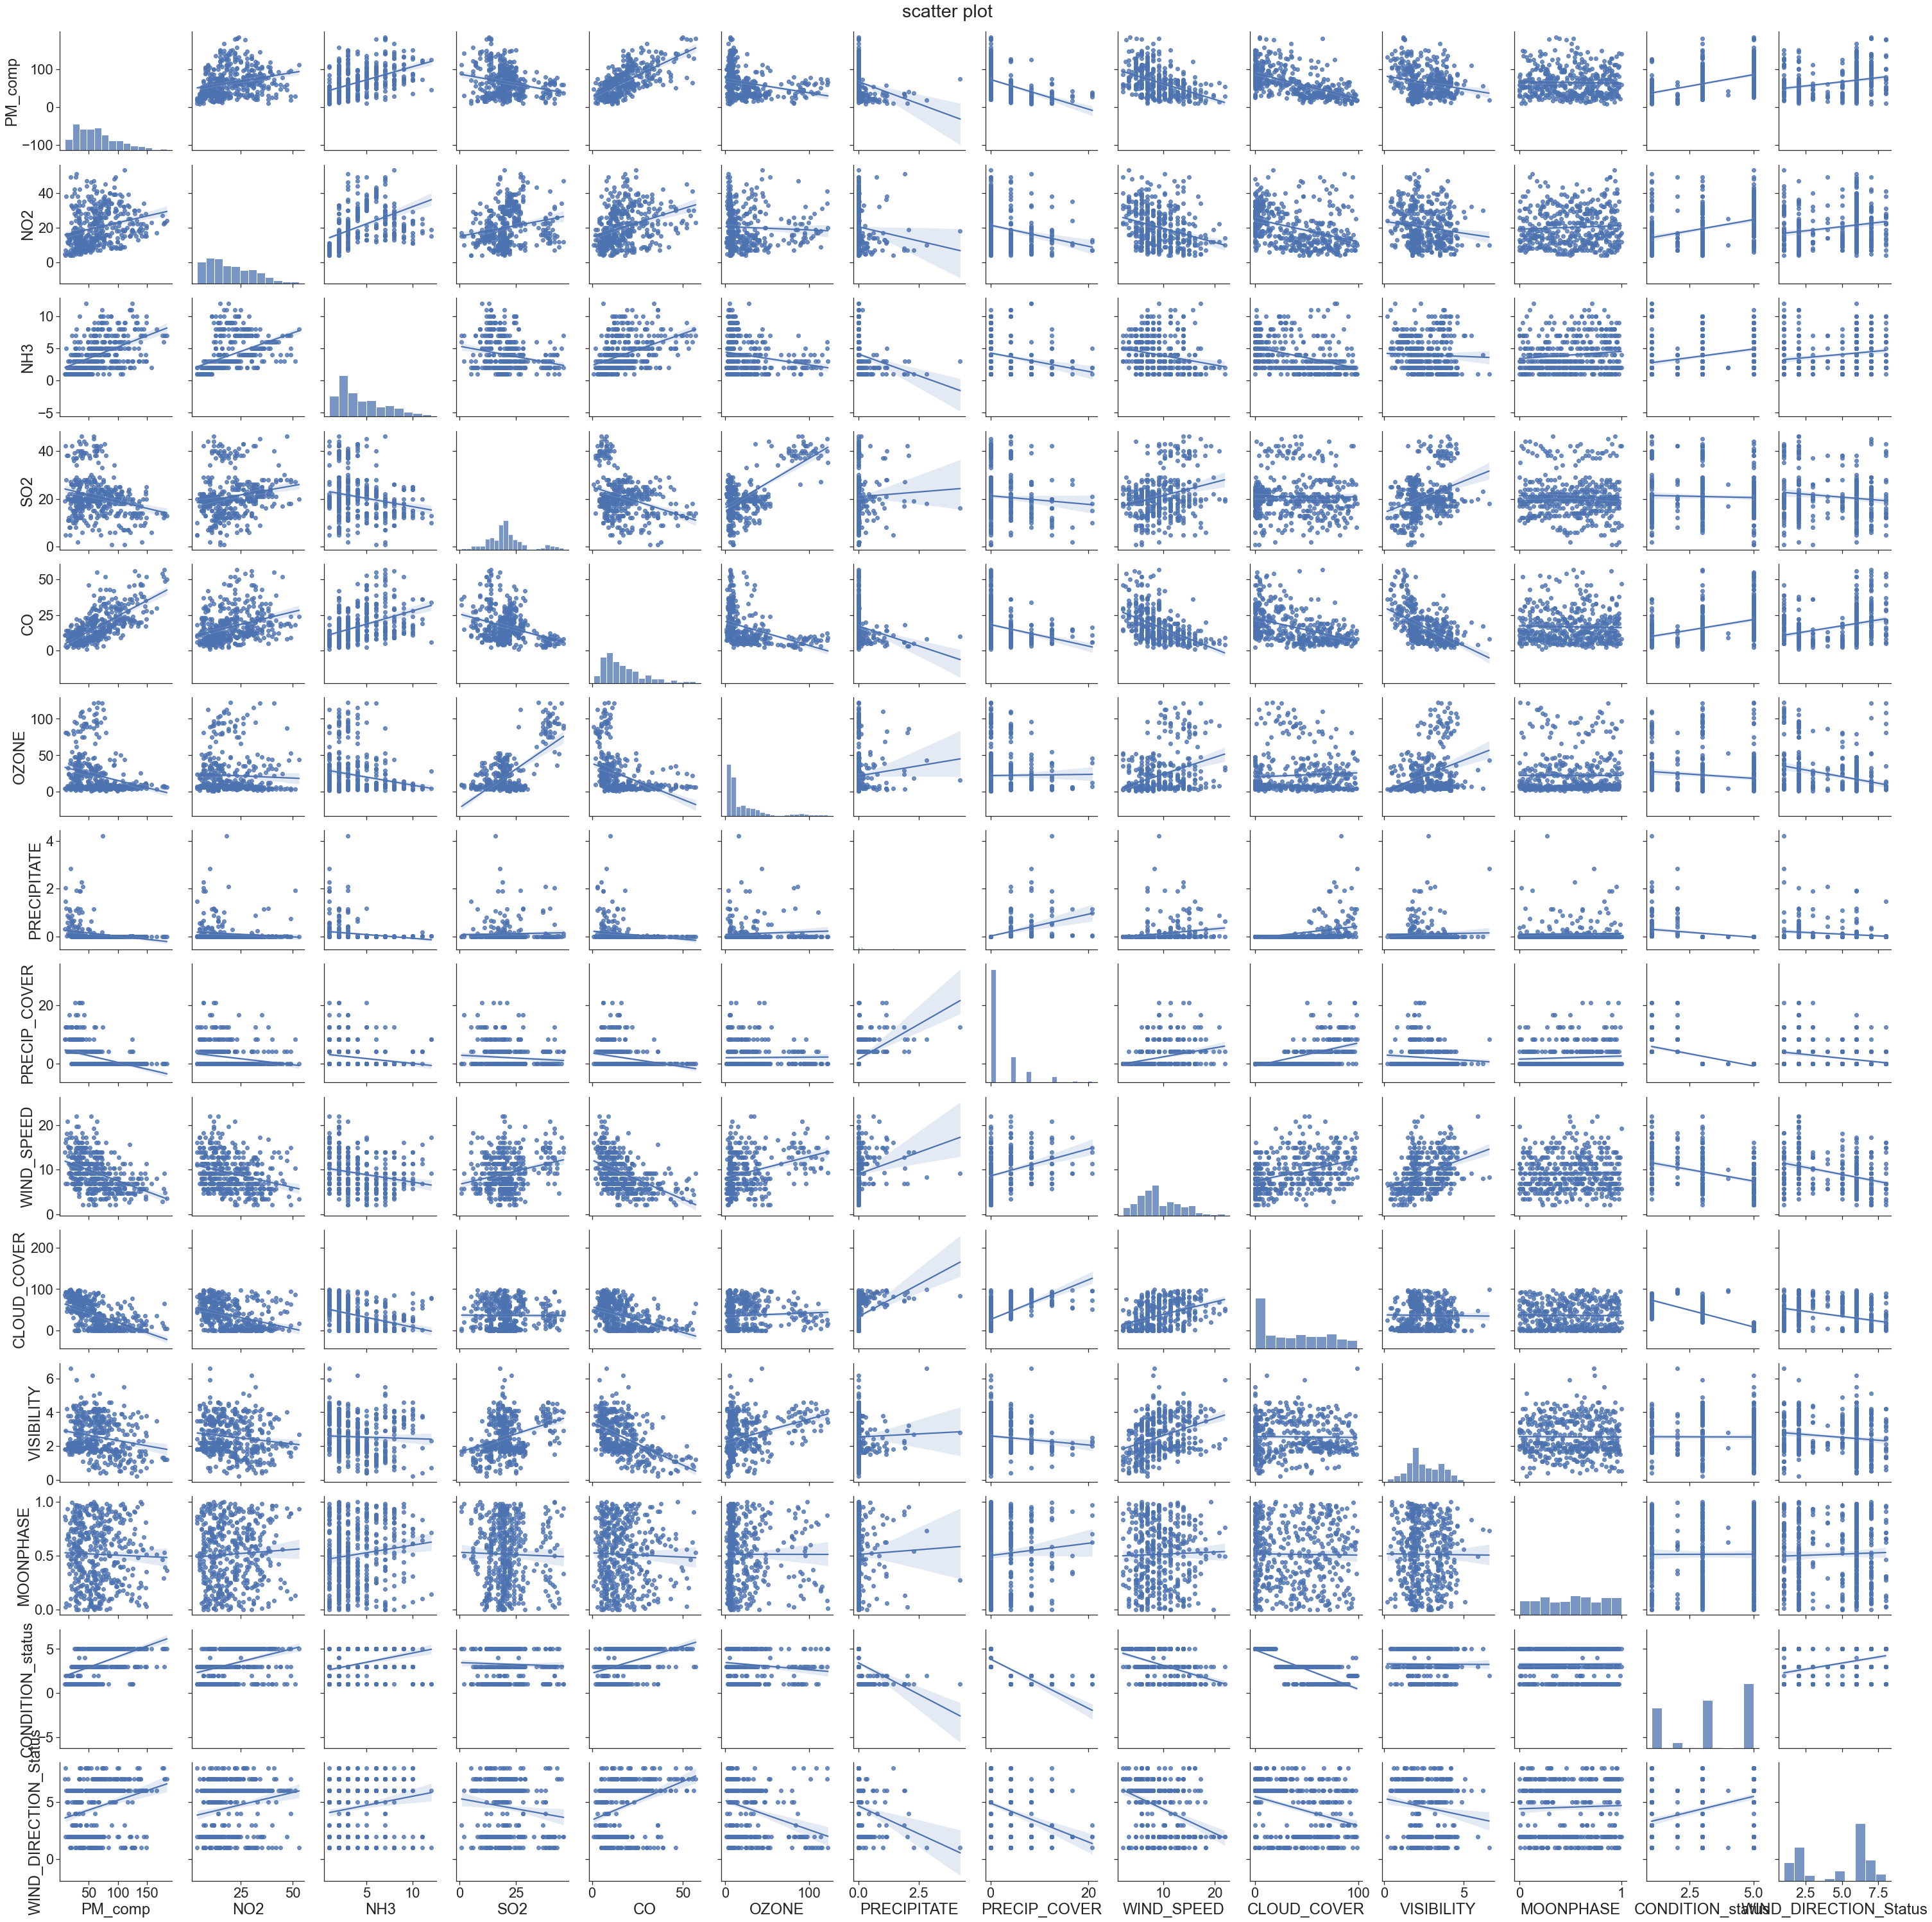

In [89]:
#Using scatter plot for determining Linearity
sns.set(style='ticks',color_codes=True,font_scale=2)
pl0t=sns.pairplot(X_final,height=3,palette='Accent',diag_kind='hist',kind='reg')
pl0t.fig.suptitle('scatter plot',y=1)

>2. Multicollinearity (The independent variables are not highly correlated with each other) 

<AxesSubplot:>

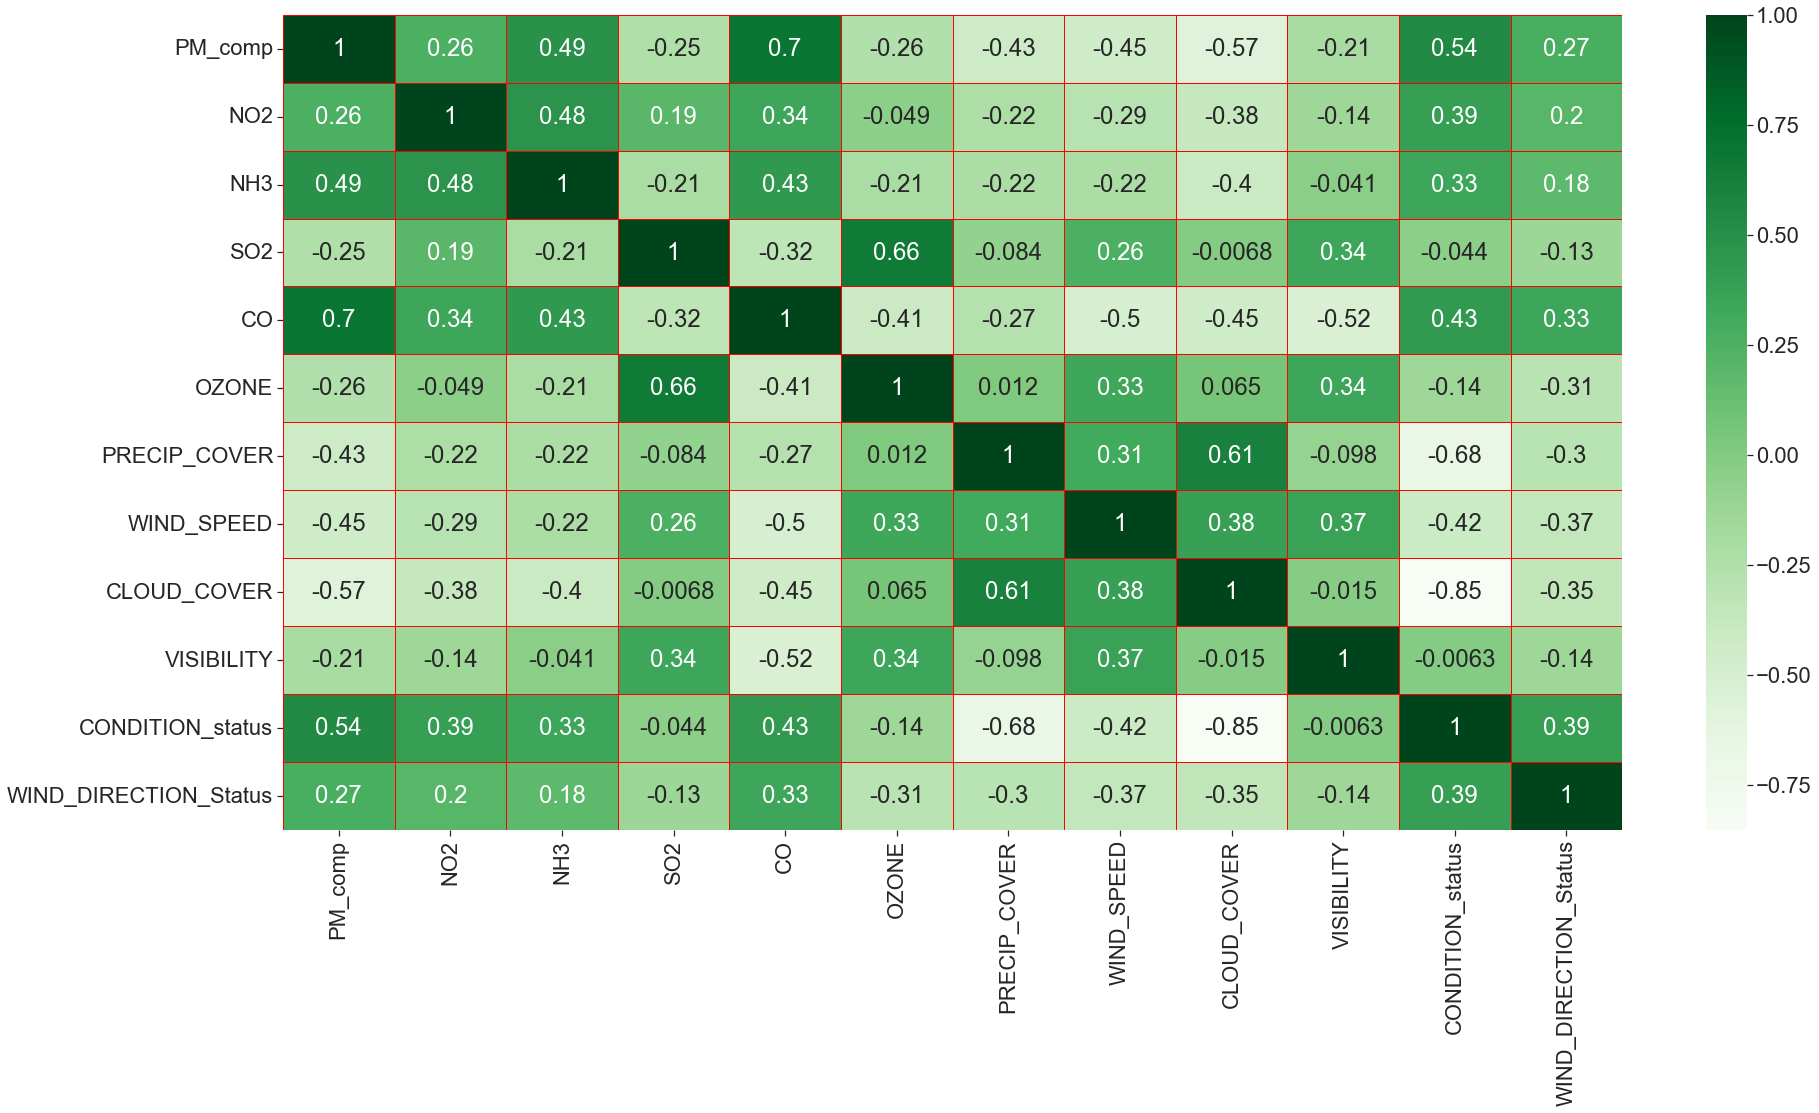

In [90]:
plt.figure(figsize=(30,15))
sns.heatmap(X_FINAL.corr(), cmap="Greens",annot=True,linewidths=1,linecolor="red")

>3. Normality of residuals

Text(0.5, 1.0, 'Distribution of Residual')

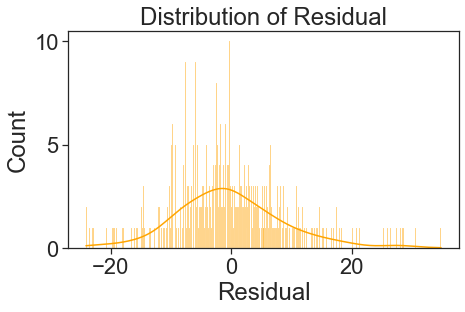

In [91]:
#Using Histogram plot
plt.figure(figsize=(7,4))
sns.histplot(data=Predicted,x="Residual",bins=442,kde=True,color="orange")
plt.xlabel("Residual")
plt.ylabel("Count")
plt.title("Distribution of Residual")

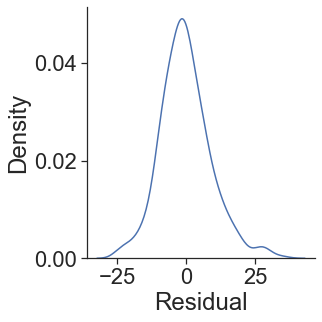

In [92]:
sns.displot(Predicted.Residual,kind="kde")

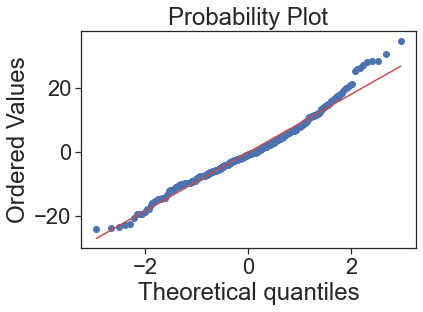

In [93]:
#Using QQ-plot
fig, ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(Predicted.Residual,plot=ax,fit=True)
plt.show()

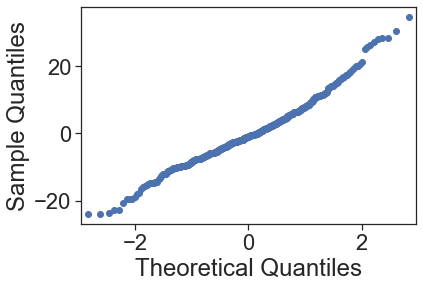

In [94]:
#Using QQ-Plot
fig=sm.qqplot(Predicted.Residual)
plt.show()

> Applying Shapiro wilk test to check Normality of Residuals

In [95]:
#Null hypothesis that Residual follow normal distribution
shapiro(Predicted.Residual)

ShapiroResult(statistic=0.9775571823120117, pvalue=2.4721909994696034e-06)

In [96]:
2.4721909994696034e-06<0.05

True

Since p-value is less than 0.05, we reject null hypothesis of Shapiro_wilk test.
This mean we have sufficient evidence to say that residual term does not follow normal distribution

> 4. Independence of residuals (no autocorrelation) 

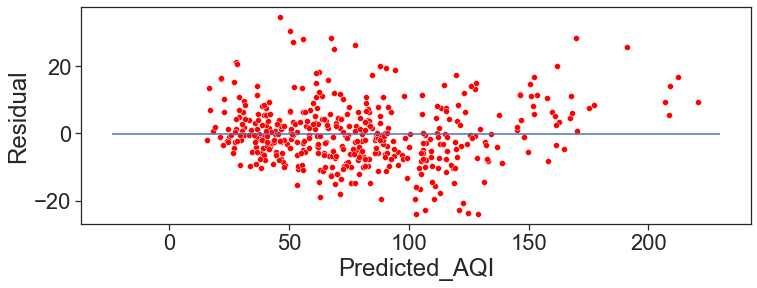

In [97]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.scatterplot(x=Predicted.Predicted_AQI,y=Predicted.Residual,color="red" )
plt.hlines(Predicted.loc[:,"Residual"].mean(),Predicted.loc[:,"Residual"].min(),230)

Durbin_Watson Test is a test statistic used to detect the presence of autocorrelation at lag 1 in the residuals from a regressive analysis.

Text(0.5, 0, 'Observation')

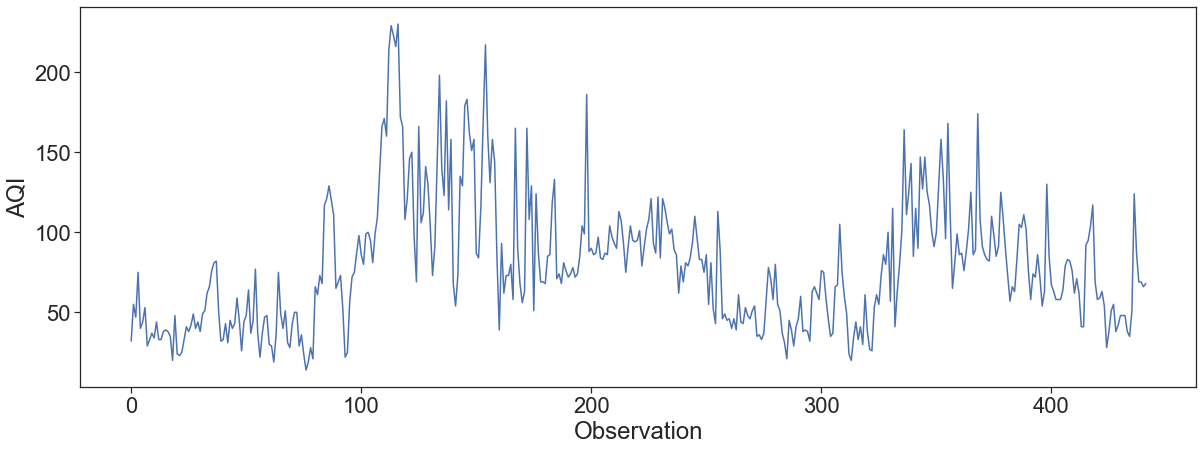

In [98]:
# Checking Whether our AQI Time series data is Stationary or not
plt.figure(figsize=(20,7))
Predicted["AQI"].plot()
plt.ylabel("AQI")
plt.xlabel("Observation")

From the above plot its hard to tell whether AQI posseses Stationary Time series or not, so applying Dickey-Fuller test stationarity of time series.

In [99]:
#Null hypo that the time series data is non stationary
#Alter hypo that is stationary
#Assume alpha=0.05, meaning 95% confidence. The test are interepted with p-value if p>0.05 reject null
dftest=adfuller(Predicted['AQI'],autolag='AIC')
print("1. ADF :",dftest[0])
print("2. P-Value :",dftest[1])
print("3. critical values :")
for key, val in dftest[4].items():
    print("\t",key,":",val)

1. ADF : -2.941198195520525
2. P-Value : 0.04076268881097018
3. critical values :
	 1% : -3.445613745346461
	 5% : -2.868269325317112
	 10% : -2.5703544951308404


As p-value is greater than critical values hence we cannot reject null hypothesis, Hence the AQI over Time is Non Stationary Time Series.

A Autoregressive model can be both stationary as well as non stationary where as finite Moviang Average model is always Stationary.
So it is quite obvious that we can only fit AR model for this AQI Data.
The AR part involves regressing the variable on its own lagged (i.e., past) values. The MA part involves modeling the error term as a linear combination of error terms occurring contemporaneously and at various times in the past.

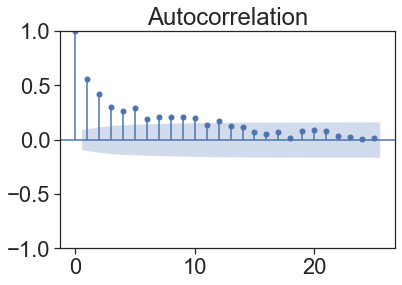

In [100]:
acf=plot_acf(Predicted["Residual"],lags=25)

From above Partial Autocorrelation plot we can say that this will not follow an AR(1) model, hence can't use Durbin_Watson test.

In [101]:
BHU_AQI_Clean=X
BHU_AQI_Clean_smt=smt.add_constant(BHU_AQI_Clean)

In [102]:
import statsmodels.regression.linear_model as rg
ivar=['const','PM_comp', 'NO2', 'NH3', 'SO2', 'CO', 'OZONE',
       'PRECIP_COVER', 'WIND_SPEED', 'CLOUD_COVER', 'VISIBILITY',
       'CONDITION_status', 'WIND_DIRECTION_Status']
reg=rg.OLS(BHU_AQI_clean['AQI'],BHU_AQI_Clean_smt[ivar],hasconst=bool).fit()

In [103]:
#Null hypothesis that no Autocorrelation
for i in [1,2,3,4,5]:
    print(i)
    print("Breusch_Godfrey LM Test Statistic:",np.round(smd.acorr_breusch_godfrey(reg, nlags=i)[0], 6))
    print("Breusch_Godfrey LM Test P_Value:",np.round(smd.acorr_breusch_godfrey(reg, nlags=i)[1], 6))

1
Breusch_Godfrey LM Test Statistic: 148.442618
Breusch_Godfrey LM Test P_Value: 0.0
2
Breusch_Godfrey LM Test Statistic: 158.347942
Breusch_Godfrey LM Test P_Value: 0.0
3
Breusch_Godfrey LM Test Statistic: 158.91049
Breusch_Godfrey LM Test P_Value: 0.0
4
Breusch_Godfrey LM Test Statistic: 161.955075
Breusch_Godfrey LM Test P_Value: 0.0
5
Breusch_Godfrey LM Test Statistic: 168.99387
Breusch_Godfrey LM Test P_Value: 0.0


For different lags the Breusch_Godfrey Statistic is greater than P_value hence we can say that Autocorrelation is present.

>5. Homoskedasticity (The variance of residuals is constant) 

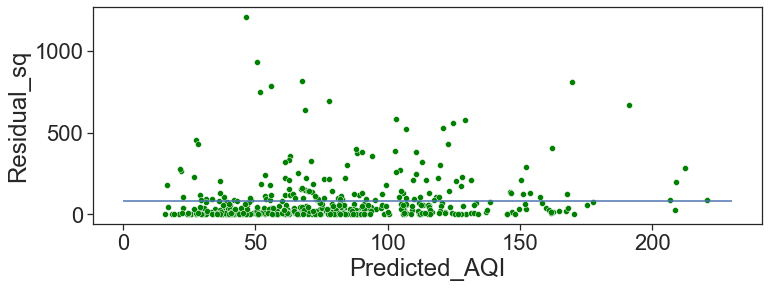

In [104]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.scatterplot(x=Predicted.Predicted_AQI,y=Predicted.Residual_sq,color="green" )
plt.hlines(Predicted.loc[:,"Residual_sq"].mean(),Predicted.loc[:,"Residual_sq"].min(),230)

> Golgfeld-Quandt test to check Homoscedasticity of Residuals

Null hypothesis: There is no heteroscedasticity i.e, homoscedasticity

Alternat hypothesis: Heteroscedasticity

In [105]:
#Sorting residuals in ascending order
sorted_AQI=Predicted.sort_values('AQI',ascending=True)
sorted_AQI

DATE  Predicted_AQI  AQI   Residual  Residual_sq
76  2021-10-01      15.885507   14  -1.885507     3.555137
77  2021-10-02      18.295330   19   0.704670     0.496560
62  2021-09-16      22.348827   19  -3.348827    11.214643
313 2022-09-13      29.319488   20  -9.319488    86.852853
18  2021-07-24      21.046031   20  -1.046031     1.094181
..         ...            ...  ...        ...          ...
115 2021-11-18     206.738323  216   9.261677    85.778653
154 2022-01-18     191.137485  217  25.862515   668.869699
114 2021-11-16     208.984522  223  14.015478   196.433613
113 2021-11-15     212.164707  229  16.835293   283.427083
116 2021-11-20     220.625262  230   9.374738    87.885710

[442 rows x 5 columns]

In [106]:
#N=442,C=22,K=15
#SR1=sorted residual 1
SR1=sorted_AQI["Residual_sq"].iloc[:210]
#RSS1 is residual sum of square for first sorted residuals
RSS1=SR1.sum()
#SR2=sorted residual 2
SR2=sorted_AQI["Residual_sq"].iloc[232:442]
#RSS2 is residual sum of square for second sorted residuals
RSS2=SR2.sum()
RSS1,RSS2

(11340.537568549102, 24968.55540030007)

Degree of freedom for both residual sum of square is (N-C-2K)/2=195

In [107]:
#F calculated
F_cal=RSS2/RSS1
F_cal

2.201708274354275

F_critical(195,195) at Probability level of 0.05=1.266

F_cal greater than F_critical at choosen level of significance so we can reject the hypothesis of homoscedasticity i.e, heteroscedasticity is very likely.

# 8. Prediction

In [108]:
PM_comp=float(input("Enter the measured value of (PM2.5 + PM10)*0.5 (micrograms per cubic meter of air)"))
NO2=float(input("Enter the measured value of NO2(parts per billion in air)"))
NH3=float(input("Enter the measured value of NH3(parts per million in air)"))
SO2=float(input("Enter the measured value of SO2(parts per billion in air)"))
CO=float(input("Enter the measured value of CO(parts per million in air)"))
OZONE=float(input("Enter the measured value of OZONE(Dobson unit)"))
PRECIP_COVER=float(input("Enter the measured value of PRECIPITATE COVER(mm in 24 hours)"))
WIND_SPEED=float(input("Enter the measured value of WIND SPEED(KM/H)"))
CLOUD_COVER=float(input("Enter the observed value of CLOUD COVER(Percentage)"))
VISIBILITY=float(input("Enter the measured value of VISIBILITY(KM)"))
CONDITION_status=float(input("Enter the observed value of CONDITION status(1 for Rain and partially cloudy, 2 for Rain and overcast,3 for Partially coludy,4 for Overcast,5 for Clear))"))
WIND_DIRECTION_status=float(input("Enter the observed value of WIND_DIRECTION_status(Direction(1 for NE, 2 for E,3 for SE,4 for S,5 for SW,6 for W,7 for NW,8 for N))"))

Predicted_AQI= -21.937488445489095 + 1.09734313*PM_comp -0.16656863*NO2 + 0.62840198*NH3 + 0.35216351*SO2 + 0.44972472*CO + 0.37906451*OZONE +0.03069609*PRECIP_COVER + 0.45359676*WIND_SPEED + 0.08356036*CLOUD_COVER + 0.29800233*VISIBILITY -0.7937893*CONDITION_status + 0.49830492*WIND_DIRECTION_status
Predicted_AQI

Enter the measured value of (PM2.5 + PM10)*0.5 (micrograms per cubic meter of air)12
Enter the measured value of NO2(parts per billion in air)12
Enter the measured value of NH3(parts per million in air)12
Enter the measured value of SO2(parts per billion in air)12
Enter the measured value of CO(parts per million in air)12
Enter the measured value of OZONE(Dobson unit)12
Enter the measured value of PRECIPITATE COVER(mm in 24 hours)12
Enter the measured value of WIND SPEED(KM/H)12
Enter the observed value of CLOUD COVER(Percentage)12
Enter the measured value of VISIBILITY(KM)12
Enter the observed value of CONDITION status(1 for Rain and partially cloudy, 2 for Rain and overcast,3 for Partially coludy,4 for Overcast,5 for Clear))2
Enter the observed value of WIND_DIRECTION_status(Direction(1 for NE, 2 for E,3 for SE,4 for S,5 for SW,6 for W,7 for NW,8 for N))2


20.743359914510908

# 9.  ARIMA Model

Text(0.5, 0, 'Observation')

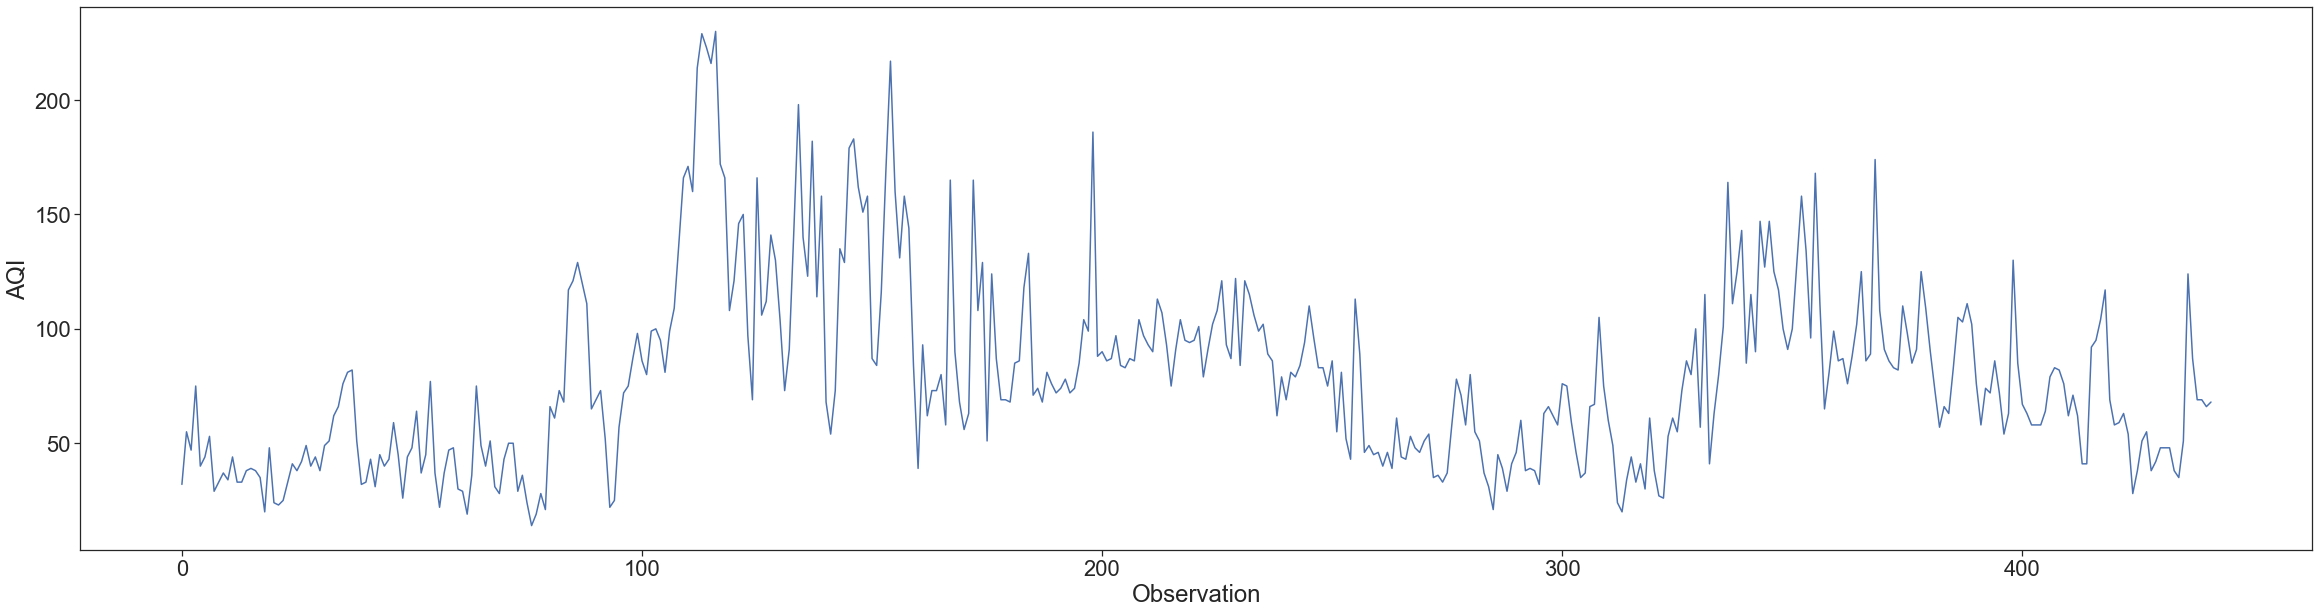

In [109]:
# Checking Whether our AQI Time series data is Stationary or not
plt.figure(figsize=(40,10))
BHU_AQI_clean["AQI"].plot()
plt.ylabel("AQI")
plt.xlabel("Observation")

> Using Rolling Method to check Stationarity of Time Series Model

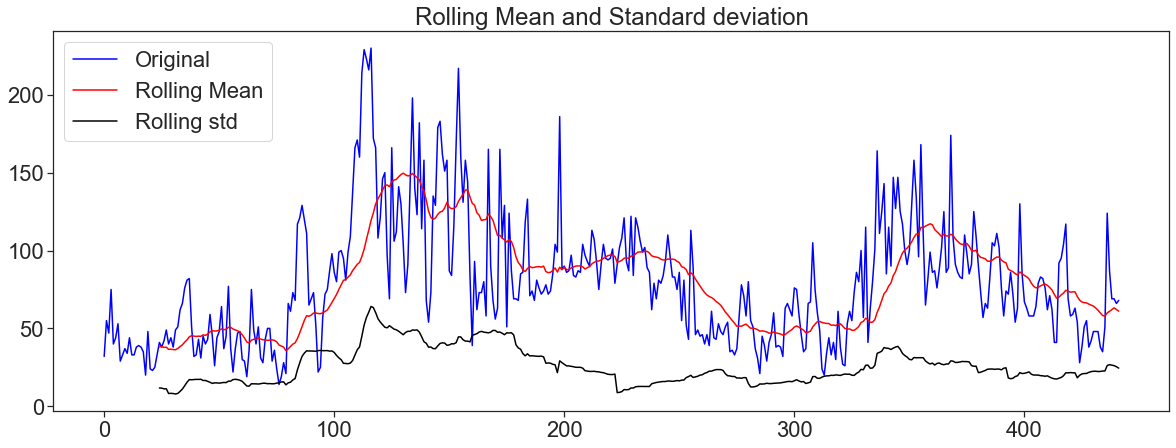

In [110]:
rollmean=BHU_AQI_clean['AQI'].rolling(25).mean()
rollstd=BHU_AQI_clean['AQI'].rolling(25).std()
plt.figure(figsize=(20,7))
fig=plt.figure(1)
original=plt.plot(BHU_AQI_clean['AQI'],color='blue',label='Original')
mean=plt.plot(rollmean,color='red',label='Rolling Mean')
std=plt.plot(rollstd,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard deviation')
plt.show()

From above plot we can say that this Time Series does not have constant mean and variance hence Non-Stationary time series.

> Checking for possible components of time series

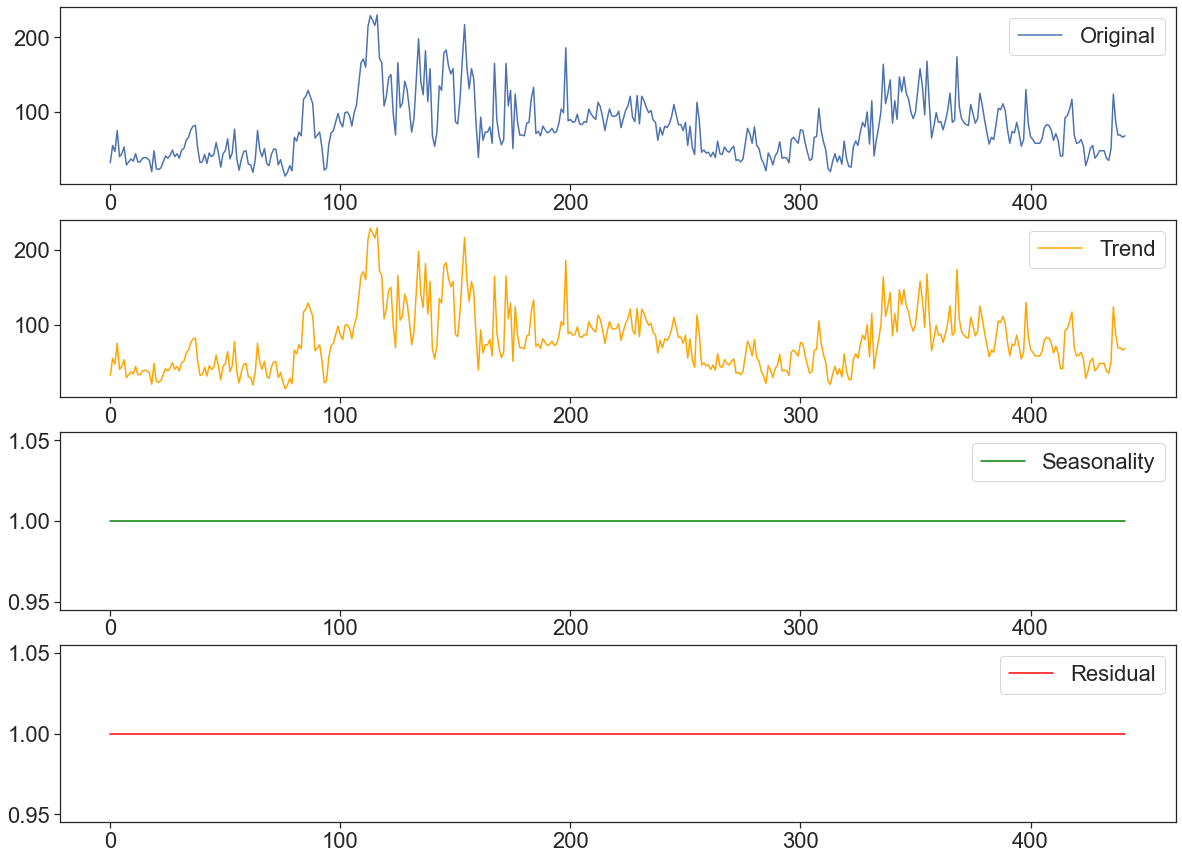

In [111]:
dec=seasonal_decompose(BHU_AQI_clean.AQI,period=1,model='multiplicative')
trend=dec.trend
seasonal=dec.seasonal
residual=dec.resid
plt.figure(figsize=(20,15))
fig=plt.figure(1)
plt.subplot(411)
plt.plot(BHU_AQI_clean['AQI'],label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend',color='orange')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality',color='green')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residual',color='red')
plt.legend(loc='best')
plt.show()

Hence AQI is a Non Stationary Time series with trend component.

ARIMA models are applied in some cases where data show evidence of non-stationarity.

Autoregression (AR): refers to a model that shows a changing variable that regresses on its own lagged, or prior, values.

Integrated (I): represents the differencing of raw observations to allow the time series to become stationary (i.e., data values are replaced by the difference between the data values and the previous values).

Moving average (MA):  incorporates the dependency between an observation and a residual error from a moving average model applied to lagged observations.

p: the number of lag observations in the model, also known as the lag order.
   
   d: the number of times the raw observations are differenced; also known as the degree of differencing.
   
   q: the size of the moving average window, also known as the order of the moving average.




> Trying Differencing to make Time Series Stationary

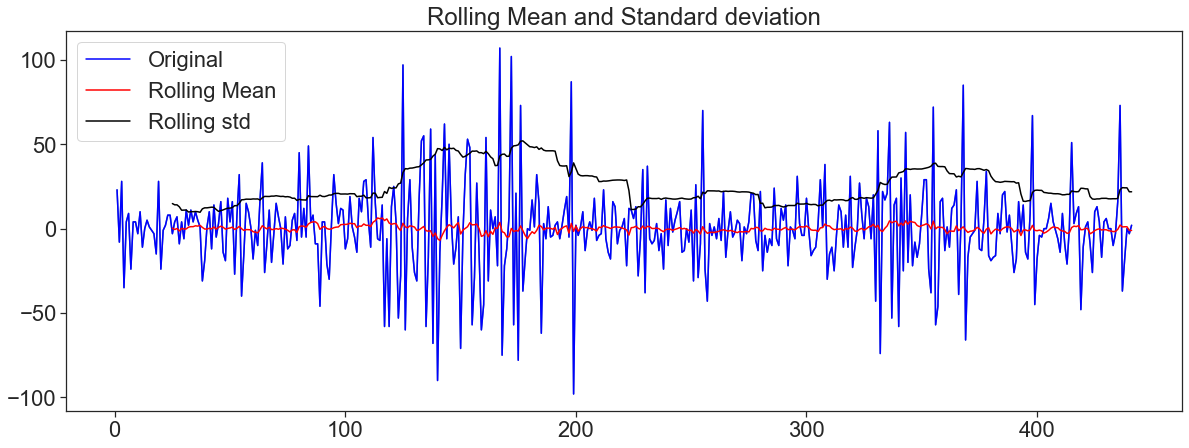

In [112]:
plt.figure(figsize=(20,7))
AQI_diff=BHU_AQI_clean['AQI']-BHU_AQI_clean['AQI'].shift(1)
plt.plot(AQI_diff)
rollmean=AQI_diff.rolling(25).mean()
rollstd=AQI_diff.rolling(25).std()
fig=plt.figure(1)
original=plt.plot(AQI_diff,color='blue',label='Original')
mean=plt.plot(rollmean,color='red',label='Rolling Mean')
std=plt.plot(rollstd,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard deviation')
plt.show()

Rolling mean and rolling variance look like constant if we see small part at a time, So can be said as stationary time series


In [113]:
#Checking whether lag 1 can make series Stationary
AQI_diff=BHU_AQI_clean['AQI']-BHU_AQI_clean['AQI'].shift(1)
AQI_diff1=AQI_diff.dropna()

> Checking Stationarity of Time Series model by Argumented Dickey Fuller Test

In [114]:
#Null hypo that the time series data is non stationary
#Alter hypo that is stationary
#Assume alpha=0.05, meaning 95% confidence. The test are interepted with p-value if p>0.05 reject null
dftest=adfuller(AQI_diff1,autolag='AIC')
print("1. ADF :",dftest[0])
print("2. P-Value :",dftest[1])
print("3. critical values :")
for key, val in dftest[4].items():
    print("\t",key,":",val)

1. ADF : -12.275296412155138
2. P-Value : 8.459469502689792e-23
3. critical values :
	 1% : -3.445542818501549
	 5% : -2.868238133603207
	 10% : -2.5703378690483176


P_value greater than critical value so null hypothesis is rejected hence Time series is now Stationary.

> Checking what value of p and q

C:\Users\Ankur\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


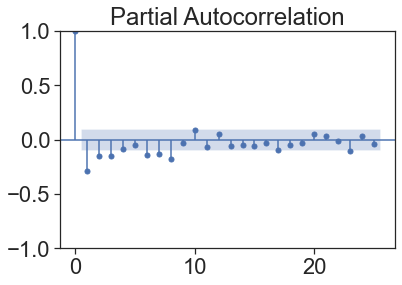

In [115]:
pacf=plot_pacf(AQI_diff1,lags=25)

From the Partial Autocorrelation plot we can say the MA(1) might fit, hence p might equal to 1

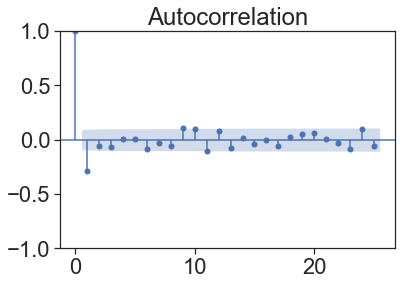

In [116]:
acf=plot_acf(AQI_diff1,lags=25)

From Autocorrelation plot we can say AR(1) might fit, hence q might equal to 1

So we can say that our Time series model might follow ARIMA(1,1,1).

> Checking for best (p,d,q) for our model 

In [117]:
!pip install pmdarima

In [118]:
import pmdarima as pm
def arimamodel(timeseries):
    automodel=pm.auto_arima(timeseries,start_p=1,sttart_q=1,max_p=5,max_q=5,test='adf',seasonal=True,trace=True)
    return automodel
arimamodel(BHU_AQI_clean['AQI'])

Performing stepwise search to minimize aic
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4078.368, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4152.351, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4117.160, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4101.023, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4150.355, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4090.372, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4078.168, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4078.263, Time=0.21 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4109.025, Time=0.11 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4080.193, Time=0.35 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=4076.202, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=4099.031, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=4115.165, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=4076.302, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0]          

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

So our intution were right that this Time Series model wil follow ARIMA(1,1,1).

> Visualization of Original Vs Predicted AQI

In [119]:
plt.figure(figsize=(20,7))
model=sm.tsa.arima.ARIMA(BHU_AQI_clean['AQI'],order=(1,1,1))
result=model.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                    AQI   No. Observations:                  442
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2035.101
Date:                Sat, 22 Apr 2023   AIC                           4076.202
Time:                        12:07:17   BIC                           4088.469
Sample:                             0   HQIC                          4081.041
                                - 442                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4891      0.048     10.245      0.000       0.396       0.583
ma.L1         -0.8738      0.027    -32.636      0.000      -0.926      -0.821
sigma2       596.0025     28.706     20.762      0.0

<Figure size 1440x504 with 0 Axes>

> Visualization of Actual and Predicted AQI through ARIMA(1,1,1) model

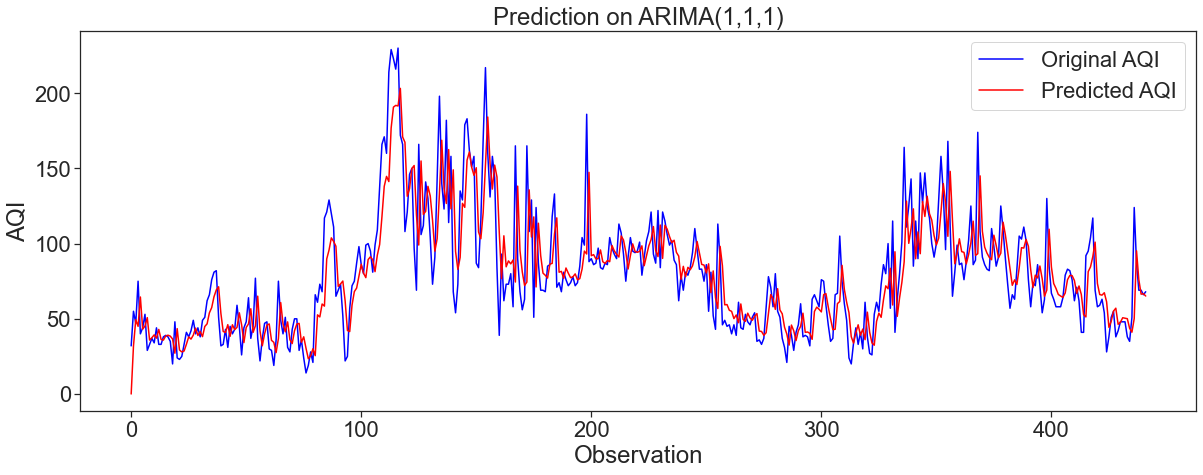

In [120]:
fig=plt.figure(figsize=(20,7))
original=plt.plot(BHU_AQI_clean['AQI'],color='blue',label='Original AQI')
predicted=plt.plot(result.fittedvalues,color='red',label='Predicted AQI')
plt.xlabel('Observation')
plt.ylabel('AQI')
plt.legend(loc='best')
plt.title('Prediction on ARIMA(1,1,1)')
plt.show()

In [121]:
#Correlation between AQI and Predicted AQI
np.corrcoef(BHU_AQI_clean['AQI'],result.fittedvalues)

array([[1.        , 0.79751633],
       [0.79751633, 1.        ]])

In [122]:
Predicted=result.fittedvalues
Predicted.head()

0     0.000000
1    31.994482
2    49.420536
3    44.968117
4    64.496827
dtype: float64

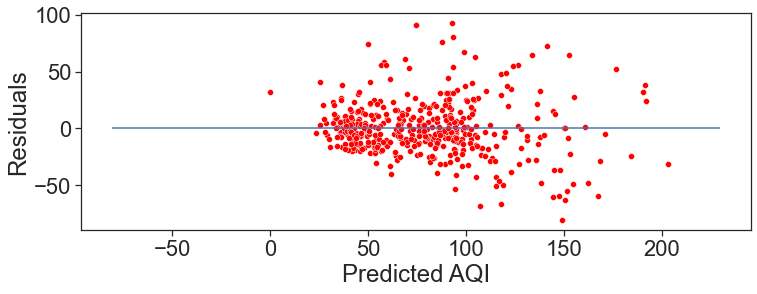

In [123]:
Residual=BHU_AQI_clean['AQI']-result.fittedvalues
fig, ax = plt.subplots(figsize=(12, 4))
sns.scatterplot(y=Residual,x=Predicted,color="red" )
plt.ylabel("Residuals")
plt.xlabel("Predicted AQI")
plt.hlines(Residual.mean(),Residual.min(),230)

In [124]:
Residual.mean()

0.31097227722702425

In [125]:
rmse=sqrt(mean_squared_error(result.fittedvalues,BHU_AQI_clean['AQI']))
print(rmse)

24.442521363692773


Root mean square error is quite high so our model is not optimal.

In [126]:
ARIMA_model=sm.tsa.arima.ARIMA(BHU_AQI_clean['AQI'],order=(1,1,1))
Prediction_ARIMA=ARIMA_model.fit()
Prediction_ARIMA

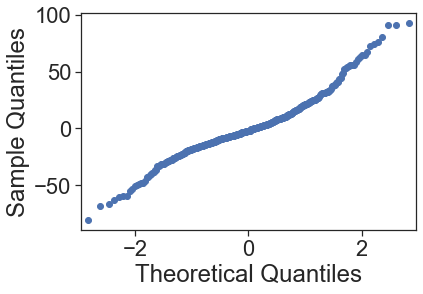

In [127]:
#Using QQ-Plot
fig=sm.qqplot(Residual)
plt.show()

In [128]:
#Null hypothesis that Residual follow normal distribution
shapiro(Residual)

ShapiroResult(statistic=0.9553079605102539, pvalue=2.5873003739462774e-10)

Hence not normally distributed

Text(0.5, 0, 'Predicted AQI')

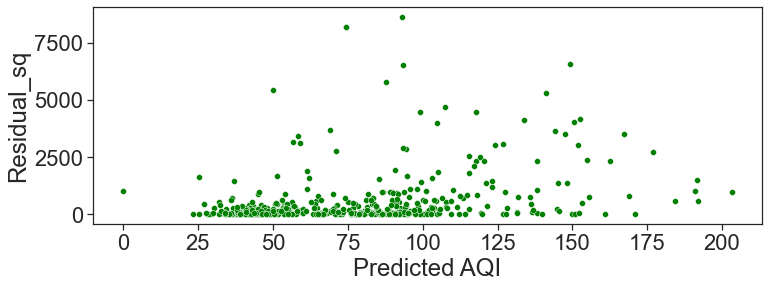

In [129]:
z=Residual*Residual
fig, ax = plt.subplots(figsize=(12, 4))
sns.scatterplot(x=Predicted,y=z,color="green" )
plt.ylabel("Residual_sq")
plt.xlabel("Predicted AQI")

Hence heteroscedasticity

# 10. Prediction for next 30 days using ARIMA(1,1,1) model

In [130]:
index_future_dates=pd.date_range(start='2023-2-21',end='2023-3-23')
#print(index_future_dates)
Predicted_ARIMA=Prediction_ARIMA.predict(start=len(BHU_AQI_clean),end=len(BHU_AQI_clean)+30,type='levels').rename('ARIMA Prediction')
#print(comp_pred)
Predicted_ARIMA.index=index_future_dates
print(Predicted_ARIMA)


2023-02-21    66.483046
2023-02-22    65.741046
2023-02-23    65.378105
2023-02-24    65.200576
2023-02-25    65.113740
2023-02-26    65.071265
2023-02-27    65.050489
2023-02-28    65.040327
2023-03-01    65.035356
2023-03-02    65.032925
2023-03-03    65.031735
2023-03-04    65.031154
2023-03-05    65.030869
2023-03-06    65.030730
2023-03-07    65.030662
2023-03-08    65.030629
2023-03-09    65.030612
2023-03-10    65.030604
2023-03-11    65.030600
2023-03-12    65.030599
2023-03-13    65.030598
2023-03-14    65.030597
2023-03-15    65.030597
2023-03-16    65.030597
2023-03-17    65.030597
2023-03-18    65.030597
2023-03-19    65.030597
2023-03-20    65.030597
2023-03-21    65.030597
2023-03-22    65.030597
2023-03-23    65.030597
Freq: D, Name: ARIMA Prediction, dtype: float64


<AxesSubplot:>

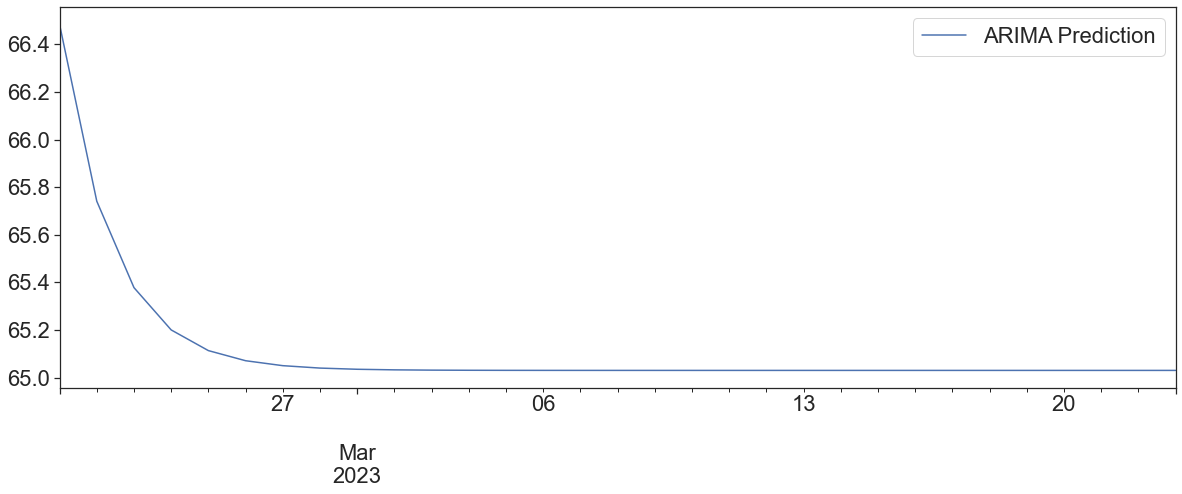

In [131]:
Predicted_ARIMA.plot(figsize=(20,7),legend=True)

# 11. Conclusion

1.The formed Multiple Linear Regression Model is given by  AQI= -21.937488445489095 + 1.09734313*PM_comp -0.16656863*NO2 +  0.62840198*NH3 + 0.35216351*SO2 + 0.44972472*CO+ 0.37906451*OZONE + 0.03069609*PRECIP_COVER + 0.45359676*WIND_SPEED + 0.08356036*CLOUD_COVER + 0.29800233*VISIBILITY-0.7937893*CONDITION_status + 0.49830492*WIND_DIRECTION_status

2.The above model have R square value of 0.946 and Adjusted R square value as 0.944

3.The 95% of model variability can be explained by 11 Principal components

4.The Residuals of Multiple Linear Regression Model does not follow the assumption of normality

5.The Residuals of Multiple Linear Regression Model aur correlated, hence Autocorrelation Present

6.The Residuals of Multiple Linear Regression Model does not have constant Variance throughtout, hence Heteroscedasticity most likely present

7.The Time Series(AQI of BHU) Model is not Stationary

8.The Time series Model is Stationary after applying differencing of order 1

9.The Time Series is following ARIMA(1,1,1) model

10.The ARIMA(1,1,1) model is not much of a use as its Akaike Information Criterion(AIC) is High.

11.The ARIMA model formed have the problem of Autocorrelation, Heteroscedasticity and non-Normality of residuals. 